## **Depressão: Influências e Correlações**

O transtorno depressivo é um desafio complexo de saúde pública que afeta um grande número de pessoas globalmente. Sua origem é multifatorial, resultante da interação entre diversos elementos individuais, socioeconômicos e ambientais. Compreender esses fatores e sua relação com os sintomas depressivos é crucial para desenvolver estratégias eficazes de prevenção e tratamento.

Os dados utilizados neste projeto são provenientes da NHANES (National Health and Nutrition Examination Survey), uma pesquisa conduzida anualmente nos Estados Unidos para avaliar a saúde e a nutrição de pessoas. Essa fonte de dados abrangente oferece uma oportunidade única para explorar a relação entre diferentes variáveis e sintomas depressivos em uma amostra da população americana.

Nesse contexto, o objetivo deste projeto é analisar os dados da NHANES referentes ao período de 2005 a 2006, a fim de investigar duas questões fundamentais:

**1) Qual é o perfil dos adultos (maiores de 18 anos) com sintomas depressivos nos Estados Unidos durante esse período?**

**2) Existe uma associação entre hábitos saudáveis de alimentação e atividade física e a redução dos índices de depressão nessa população?**

Por meio de técnicas de análise de dados, buscamos extrair insights relevantes que possam contribuir para uma melhor compreensão da depressão.

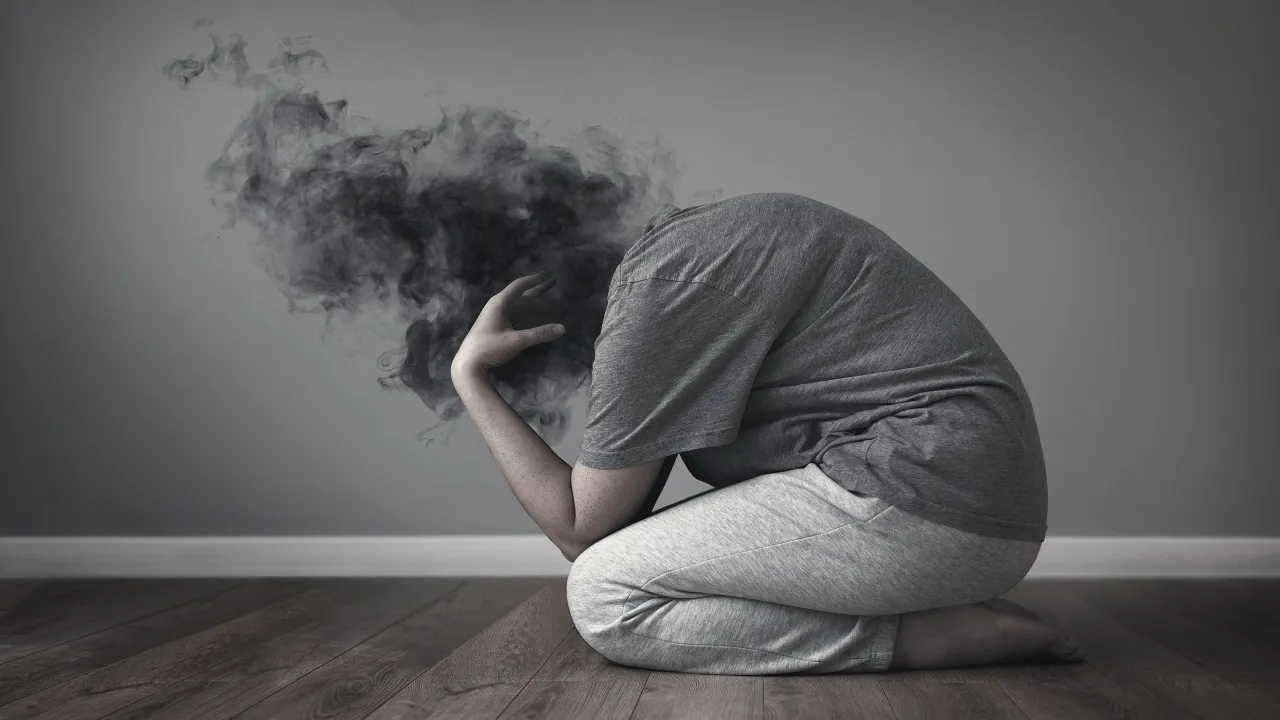

Fonte da imagem: Veja Saúde

## **Importações**

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kendalltau, spearmanr, chi2_contingency, shapiro, mannwhitneyu,levene, shapiro, kruskal, pearsonr
from sklearn.utils import resample
import scikit_posthocs as sp

## **Conhecendo o DataFrame - Demo**

Será observada as características básicas do DataFrame demo. O objetivo é compreender a quantidade de colunas, seus tipos, quantidade de linhas, dentre outros.

### **Dicionário das Variáveis** - Demo

* **SEQN:** Identificador único do respondente.

* **DPQ010:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por ter pouco interesse ou pouco prazer em fazer as coisas?

    * **Valores:**
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ020:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu para baixo, deprimido(a) ou sem perspectiva?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ030:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ040:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu cansado(a) ou com pouca energia?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ050:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você sentiu falta de apetite ou comeu demais?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ060**:

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ070:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ080:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ090:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **RIAGENDR:**

    * **Descrição:** Gênero
    * **Valores:**
        * 1: Masculino
        * 2: Feminino

* **RIDAGEYR:**

    * **Descrição:** Idade em anos

* **RIDRETH1:**

    * **Descrição:** Raça/Etnia
    * **Valores:**

        * 1: Branco não-hispânico
        * 2: Negro não-hispânico
        * 3: Mexicano-americano
        * 4: Outro
        * 5: Outro - Hispânico

* **DMDEDUC:**

    * **Descrição:** Escolaridade
    * **Valores:**
        * 1: Menor que 9o ano
        * 2: 9-12o ano
        * 3: Ensino médio
        * 4: Ensino superior incompleto
        * 5: Superior completo ou maior
        * 7: Se recusou a responder
        * 9: Não sabe

* **INDFMINC:**

    * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe

In [290]:
demo = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/DEMO_PHQ.csv')

In [199]:
# Verificando as primeiras linhas do DataFrame
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [200]:
# Verificando as informações básicas do DataFrame
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


As variáveis estão com um tipo que permite prosseguir com a análise, portanto, não serão transformadas em outros tipos.

Será realizado a soma de DPQ010 à DPQ090 para obter um valor que possa representar o grau de sintomas depressivos. Como o valor 7 representa que a pessoa se recusou a responder e o valor 9 significa que a pessoa não sabe, serão alterados para 0, para não influenciarem no Score.

In [201]:
# Seperando as colunas DPQ010 à DPQ090
colunas = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

# Como os valores de 7 e 9 podem influenciar a métrica DPQ_SCORE, mesmo não possuindo informações que contribuam, serão substituídos por 0, assim não influenciarão.
demo[colunas] = demo[colunas].replace({7: 0, 9: 0})

demo['DPQ_SCORE'] = demo[colunas].sum(axis=1)

Será criada a coluna DEPRESSION_CATEGORY que representará o grau de sintomas depressivos conforme descrito abaixo:

* 0 ("sem sintomas") se DPQ_SCORE < 5

* 1 ("sintomas leves") se 5 <= DPQ_SCORE < 10

* 2 ("sintomas moderados a severos") se DPQ_SCORE >= 10

In [202]:
# Criando a coluna CATEGORY com base no valor de DPQ_SCORE
demo['DEPRESSION_CATEGORY'] = demo['DPQ_SCORE'].apply(lambda x: 'Sem sintomas' if x < 5 else ('Sintomas leves' if x < 10 and x >= 5 else 'Sintomas moderados a severos'))

In [203]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 5
demo['DEPRESSION_CATEGORY'].loc[demo['DPQ_SCORE'] < 5].value_counts()

DEPRESSION_CATEGORY
Sem sintomas    4315
Name: count, dtype: int64

In [204]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 10 e >= 5
demo['DEPRESSION_CATEGORY'].loc[(demo['DPQ_SCORE'] < 10) & (demo['DPQ_SCORE'] >= 5)].value_counts()

DEPRESSION_CATEGORY
Sintomas leves    714
Name: count, dtype: int64

In [205]:
# Verificando se criou corretamente para os valores de DPQ_SCORE >= 10
demo['DEPRESSION_CATEGORY'].loc[demo['DPQ_SCORE']>= 10].value_counts()

DEPRESSION_CATEGORY
Sintomas moderados a severos    305
Name: count, dtype: int64

## **Limpeza dos dados** - Demo

In [206]:
# Veriricando a porcentagem de valores ausentes
demo.isnull().sum() / demo.shape[0] * 100

SEQN                   0.000000
DPQ010                 9.336333
DPQ020                 9.336333
DPQ030                 9.336333
DPQ040                 9.336333
DPQ050                 9.336333
DPQ060                 9.336333
DPQ070                 9.336333
DPQ080                 9.336333
DPQ090                 9.336333
RIAGENDR               0.000000
RIDAGEYR               0.000000
RIDRETH1               0.000000
DMDEDUC                0.000000
INDFMINC               0.881140
DPQ_SCORE              0.000000
DEPRESSION_CATEGORY    0.000000
dtype: float64

As colunas DPQ010 à DPQ090 apresentam uma quantidade significativa de valores nulos, portanto, deve-se análisar se os dados ausentes têm relação com alguma variável. Por estar interessado principalmente na presença e na direção de uma relação entre duas variáveis, independentemente da forma específica da relação, a correlação de Spearman ou de Kendall pode ser preferível. Portanto, será realizado ambos os testes para verificar se são aleatórias as ausencias de dados.

### Correlação de Kendall

In [207]:
# Criar variáveis indicadoras de ausência para as variáveis DPQ
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Kendall entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_kendall = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_kendall[col] = {}
        for var in variaveis_interesse:
            tau, _ = kendalltau(demo[col], demo[var])
            correlacoes_kendall[col][var] = tau

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_kendall = pd.DataFrame(correlacoes_kendall)

print(df_correlacoes_kendall)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

### Correlação de Spearman

In [208]:
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Spearman entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_spearman = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_spearman[col] = {}
        for var in variaveis_interesse:
            rho, _ = spearmanr(demo[col], demo[var])
            correlacoes_spearman[col][var] = rho

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_spearman = pd.DataFrame(correlacoes_spearman)

print(df_correlacoes_spearman)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/359601840.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(demo[col], demo[var])


Como não apresentou forte correlação entre as variáveis, será realizada a limpeza dos valores nulos, para não prejuficar a análise. Está sendo considerado que os valores nulos apresentados no DataFrame são do tipo MCAR (Missing Completely At Random), ou seja, a probabilidade de um valor estar ausente é a mesma para todas as observações. Os valores ausentes são imprevisíveis e não podem ser explicados por nenhuma variável observada. A variável INDFMINC apresenta uma quantidade extremamente baixa de valores nulos, portanto, será removido os valores nulos também.

In [209]:
# Removendo as colunas que foram usadas na correlação
demo.drop(columns=['ausente_DPQ010', 'ausente_DPQ020',  'ausente_DPQ030', 'ausente_DPQ040', 'ausente_DPQ050', 'ausente_DPQ060',
       'ausente_DPQ070', 'ausente_DPQ080', 'ausente_DPQ090','ausente_DPQ_SCORE'], inplace= True)

In [210]:
# Removendo os valores nulos do DataFrame
demo.dropna(inplace=True)

## **Conhecendo o DataFrame - Pag**

### Dicionário de Dados - Pag

**SEQN:** Identificador único do respondente.

**PAG_MINW:** Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG).

**ADHERENCE:** Grupo de aderência ao Physical Activity Guideline (PAG).

* 1 = Baixo (< 150 min/semana)
* 2 = Adequado (150-300 min/semana)
* 3 = Acima (> 300 min/semana)

**HEI2015C1_TOTALVEG:** Healthy Eating Index - Componente 1 - Total de Vegetais.
* Valores possíveis: 0-5

**HEI2015C2_GREEN_AND_BEAN:** Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas.
* Valores possíveis: 0-5

**HEI2015C3_TOTALFRUIT:** Healthy Eating Index - Componente 3 - Frutas totais.
* Valores possíveis: 0-5

**HEI2015C4_WHOLEFRUIT:** Healthy Eating Index - Componente 4 - Frutas in natura.
* Valores possíveis: 0-5

**HEI2015C5_WHOLEGRAIN:** Healthy Eating Index - Componente 5 - Grãos integrais.
* Valores possíveis: 0-10

**HEI2015C6_TOTALDAIRY:** Healthy Eating Index - Componente 6 - Laticínios.
* Valores possíveis: 0-10

**HEI2015C7_TOTPROT:** Healthy Eating Index - Componente 7 - Proteínas.
* Valores possíveis: 0-5

**HEI2015C8_SEAPLANT_PROT:** Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais.
* Valores possíveis: 0-5

**HEI2015C9_FATTYACID:** Healthy Eating Index - Componente 9 - Ácido-graxo.
* Valores possíveis: 0-10

**HEI2015C10_SODIUM:** Healthy Eating Index - Componente 10 - Sódio.
* Valores possíveis: 0-10

**HEI2015C11_REFINEDGRAIN:** Healthy Eating Index - Componente 11 - Grãos refinados.
* Valores possíveis: 0-10

**HEI2015C12_SFAT:** Healthy Eating Index - Componente 12 - Gordura saturada.
* Valores possíveis: 0-10

**HEI2015C13_ADDSUG:** Healthy Eating Index - Componente 13 - Açúcares adicionados.
* Valores possíveis: 0-10

**HEI2015_TOTAL_SCORE:** Healthy Eating Index - Escore total.
* Valores possíveis: 0-100

In [211]:
pag = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/PAG_HEI.csv')

In [212]:
# Obtendo informações básicas sobre o DataFrame
pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

O tipo de dados presente nas variáveis não interferem negativamente na análise, portanto, não serão transformadas.

Sabe-se que os dados do DataFrame "demo" já estão todos tratados para se utilizar na análise. Contudo, essa nova base de dados "pag" não foi verificada se necessita de limpeza. Foi observado que o DataFrame "pag" possui 9424 registros, enquanto o DataFrame "demo" possui apenas 4800 registros. Então, faz muito mais sentido fazer a junção das tabelas, antes mesmo de verificar as irregularidades do DataFrame "pag", visto que não serão utilizados todos os dados, logo, não necessita de limpeza em toda base. 

In [213]:
df_unido = pd.merge(demo, pag, how='left', on='SEQN')

## **Limpeza de Dados** - Pag

In [214]:
df_unido.isnull().sum() / len(df_unido) * 100

SEQN                        0.000000
DPQ010                      0.000000
DPQ020                      0.000000
DPQ030                      0.000000
DPQ040                      0.000000
DPQ050                      0.000000
DPQ060                      0.000000
DPQ070                      0.000000
DPQ080                      0.000000
DPQ090                      0.000000
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.000000
DPQ_SCORE                   0.000000
DEPRESSION_CATEGORY         0.000000
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          2.041667
HEI2015C2_GREEN_AND_BEAN    2.041667
HEI2015C3_TOTALFRUIT        2.041667
HEI2015C4_WHOLEFRUIT        2.041667
HEI2015C5_WHOLEGRAIN        2.041667
HEI2015C6_TOTALDAIRY        2.041667
HEI2015C7_TOTPROT           2.041667
HEI2015C8_SEAPLANT_PROT     2.041667
H

Após a junção dos DataFrames foi observado uma quantidade extremamente baixa de valores ausentes, por não possuir uma quantidade alta, serão removidos os valores ausentes. 

In [215]:
df_unido.dropna(inplace=True)

## **Análise Exploratória Univariada**

### **Variáveis Categóricas**

In [216]:
df_unido

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
4796,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
4797,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
4798,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/544158329.py:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  grafico = sns.countplot(x='RIAGENDR', data=df_unido, hue='RIAGENDR', legend= False, palette=custom_palette)


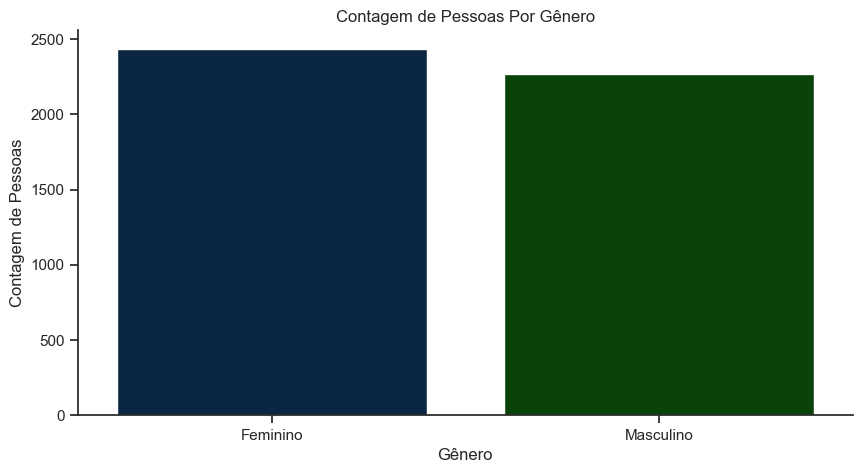

In [217]:
genero = {
    1: 'Masculino',
    2: 'Feminino'
}

df_unido['RIAGENDR'] = df_unido['RIAGENDR'].map(genero)

# Criando uma paleta de cores personalizada com tons escuros de azul, verde e roxo
custom_palette = sns.color_palette(['#00264d', '#004d00', '#660099', '#330066', '#1a1a1a'])

# Definindo o tamanho da figura
plt.figure(figsize=(10,5))

# Plotar o gráfico de barras com rótulos personalizados
grafico = sns.countplot(x='RIAGENDR', data=df_unido, hue='RIAGENDR', legend= False, palette=custom_palette)

# Definindo o título
grafico.set_title('Contagem de Pessoas Por Gênero')

# Definindo a legenda do eixo x
plt.xlabel('Gênero')

# Definindo legenda para o eixo y
plt.ylabel('Contagem de Pessoas')

# Remove a borda da direita
sns.despine(right=True)


- A quantidade de pessoas de ambos os gêneros são semelhantes, porém o gênero feminino apresenta uma quantidade superior.

In [218]:
def converter_etinia(valor):

    if valor == 1: 
        return 'Branco não-hispânico'
    elif valor == 2:
        return 'Negro não-hispânico'
    elif valor == 3:
        return 'Mexicano-americano'
    elif valor == 4:
        return 'Outro'
    elif valor == 5: 
        return 'Outro - Hispânico'
    else:
        return 'Indefinido'


df_unido['RIDRETH1'] = df_unido['RIDRETH1'].apply(converter_etinia)

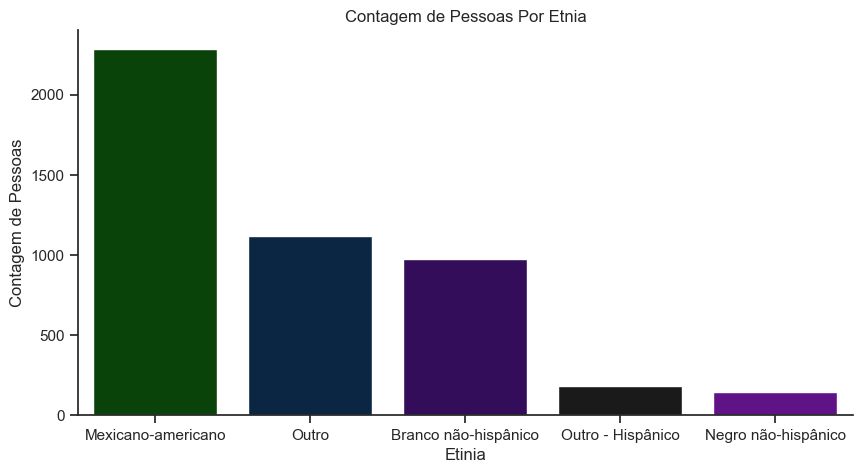

In [219]:
# Contar as ocorrências de cada valor em 'RIDRETH1' e ordenar de forma decrescente
ordem = df_unido['RIDRETH1'].value_counts().index


# Definindo o tamanho da figura
plt.figure(figsize=(10,5))

# Plotar o gráfico de barras com os valores ordenados
grafico = sns.countplot(x='RIDRETH1', data=df_unido, hue='RIDRETH1', order=ordem, palette=custom_palette, legend=False)

# Alterando o título
grafico.set_title('Contagem de Pessoas Por Etnia')

# Adicionando legenda no eixo x
plt.xlabel('Etinia')

# Adicionando legenda no eixo y
plt.ylabel('Contagem de Pessoas')

# Removendo as bordas à direta
sns.despine(right= True)

- Existe uma quantidade bem maior de pessoas consideradas Mexicano-americano.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/1997642032.py:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  grafico = sns.countplot(x='DMDEDUC', data=df_unido, hue='DMDEDUC', order=ordem, palette=custom_palette, legend=False)


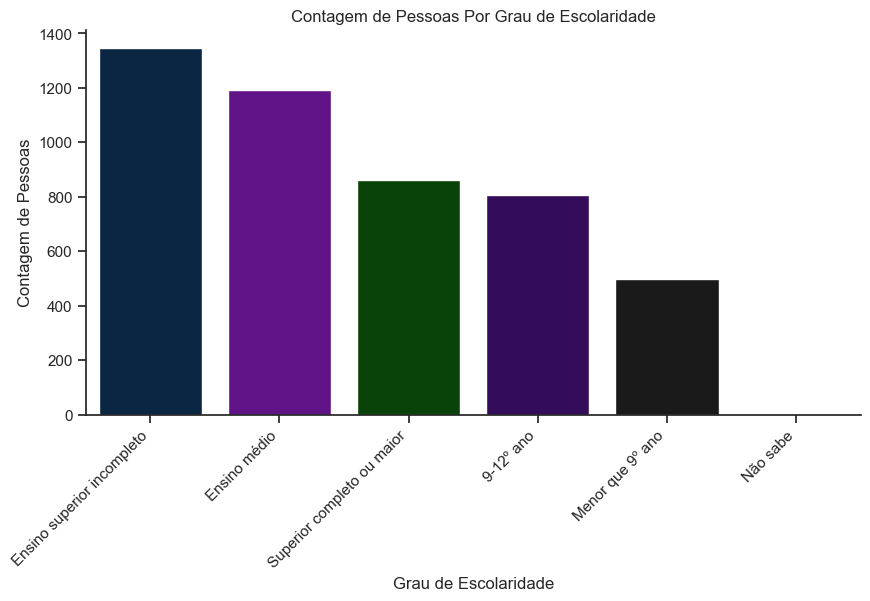

In [220]:
# Criando um dicionário com os valores correspondentes de escolaridade
escolaridade = {
    1: 'Menor que 9º ano',
    2: '9-12º ano',
    3: 'Ensino médio',
    4: 'Ensino superior incompleto',
    5: 'Superior completo ou maior',
    7: 'Se recusou a responder',
    9: 'Não sabe'

}

# Substituindo pela categoria do dicionário "escolaridade"
df_unido['DMDEDUC'] = df_unido['DMDEDUC'].replace(escolaridade)

# Obetendo a ordem decrescente dos níveis de escolaridade
ordem =  df_unido['DMDEDUC'].value_counts().index

# Adicionando um tamanho à figura
plt.figure(figsize=(10, 5))

# Adicionando Título
plt.title('Contagem de Pessoas Por Grau de Escolaridade')

# Legenda do eixo x
plt.xlabel('Grau de Escolaridade')

# Legenda do eixo y
plt.ylabel('Contagem de Pessoas')

# Criando o gráfico
grafico = sns.countplot(x='DMDEDUC', data=df_unido, hue='DMDEDUC', order=ordem, palette=custom_palette, legend=False)

# Definir os rótulos formatados para os ticks do eixo x
plt.xticks(rotation= 45, ha='right')

# Removendo as bordas à direta
sns.despine(right= True)

- A maior parte dos entrevistados possui ensino superior incompleto.

   * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe


        rendas = {
    1: 'Baixo',
    2: 'Baixo',
    3: 'Baixo',
    4: 'Baixo',
    5: 'Baixo',
    6: 'Médio',
    7: 'Médio',
    8: 'Médio',
    9: 'Alto',
    10: 'Alto',
    11: 'Alto',
    12: 'Indefinido',
    13: 'Baixo',
    77: 'Indefinido',
    99: 'Indefinido'
}

In [221]:
# Criando uma função para categorizar os salários em Baixo, Médio e Alto
def categorizar_salario(salario):

    if salario in [1, 2, 3, 4, 5, 13]:
        return 'Baixo'
    elif salario in [6, 7, 8]:
        return 'Médio'
    elif salario in [9, 10, 11]:
        return 'Alto'
    else: # 12, 77, 99
        return 'Indefinido'


In [222]:
# Aplicando a função na coluna INDFMINC
df_unido['INDFMINC'] = df_unido['INDFMINC'].apply(categorizar_salario)

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/268162679.py:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  grafico = sns.countplot(x='INDFMINC', data=df_unido, hue='INDFMINC', order=ordem, palette=custom_palette)


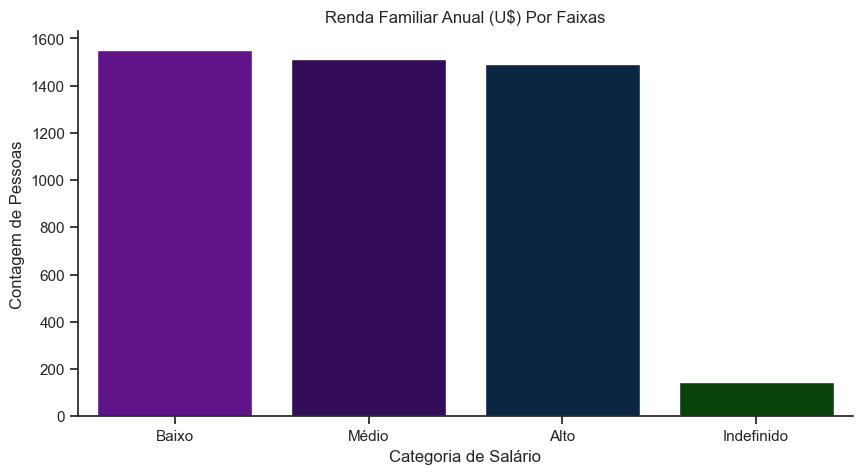

In [223]:
# Variável para ordenar de forma decrescente
ordem = df_unido['INDFMINC'].value_counts().index

# Definindo o tamanho
plt.figure(figsize=(10,5))

# Criando gráfico
grafico = sns.countplot(x='INDFMINC', data=df_unido, hue='INDFMINC', order=ordem, palette=custom_palette)

# Definindo o título
plt.title('Renda Familiar Anual (U$) Por Faixas')

# Legenda eixo x
plt.xlabel('Categoria de Salário')

# Legenda eixo y
plt.ylabel('Contagem de Pessoas')

# Removendo as bordas à direita
sns.despine(right= True)


- Possui-se uma quantidade equilibrada de renda, entre: baixa, média e alta.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/2791240614.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='DEPRESSION_CATEGORY', data=df_unido, hue='DEPRESSION_CATEGORY', legend=False, palette=custom_palette)


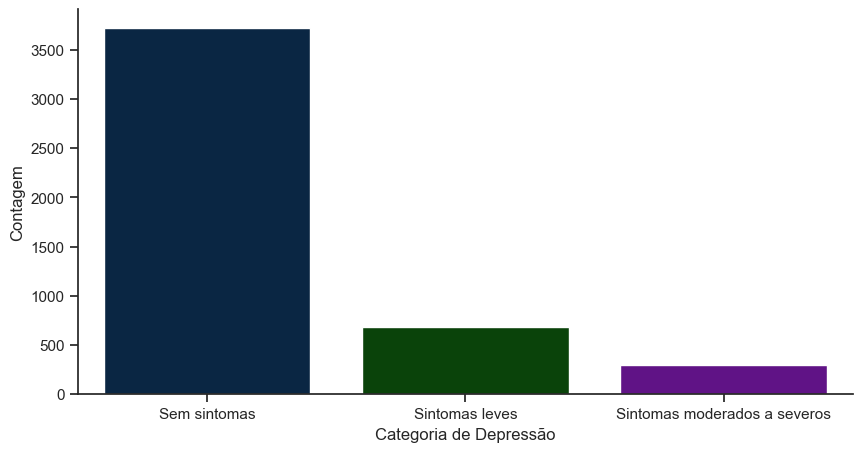

In [224]:
plt.figure(figsize=(10,5))

sns.countplot(x='DEPRESSION_CATEGORY', data=df_unido, hue='DEPRESSION_CATEGORY', legend=False, palette=custom_palette)

plt.xlabel('Categoria de Depressão')

plt.ylabel('Contagem')

sns.despine(right= True)

**ADHERENCE:** Grupo de aderência ao Physical Activity Guideline (PAG).

* 1 = Baixo (< 150 min/semana)
* 2 = Adequado (150-300 min/semana)
* 3 = Acima (> 300 min/semana)

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/964236135.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x= 'ADHERENCE', data= df_unido, hue='ADHERENCE', order=ordem, legend=False, palette=custom_palette)


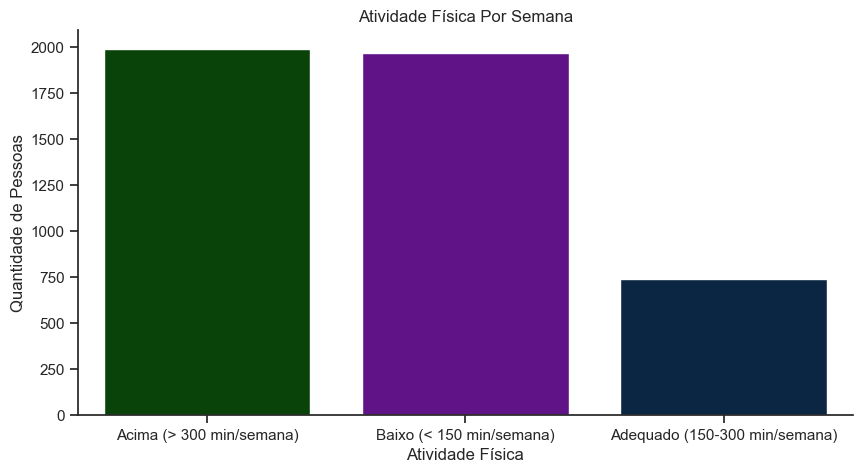

In [225]:
def converter_atividade_fisica(valor):

    if valor == 1:
        return 'Baixo (< 150 min/semana)'
    elif valor == 2: 
        return 'Adequado (150-300 min/semana)'
    elif valor == 3:
        return 'Acima (> 300 min/semana)'
    else:
        return 'Indefinido'


df_unido['ADHERENCE'] = df_unido['ADHERENCE'].apply(converter_atividade_fisica)
    

ordem = df_unido['ADHERENCE'].value_counts().index

plt.figure(figsize=(10,5))

sns.countplot(x= 'ADHERENCE', data= df_unido, hue='ADHERENCE', order=ordem, legend=False, palette=custom_palette)

plt.title('Atividade Física Por Semana')
plt.xlabel('Atividade Física')
plt. ylabel('Quantidade de Pessoas')

sns.despine(right=True)



- Muitas pessoas praticam exercícios acima do tempo adequado ou abaixo; 
- Poucas pessoas possuem o tempo de exercício adequado na semana.

### **Variáveis Numéricas**

In [226]:
df_unido.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_SCORE', 'DEPRESSION_CATEGORY', 'PAG_MINW',
       'ADHERENCE', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/2091045119.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='RIDAGEYR', data=df_unido, bins=10, alpha=0.8, palette=custom_palette, edgecolor='black')


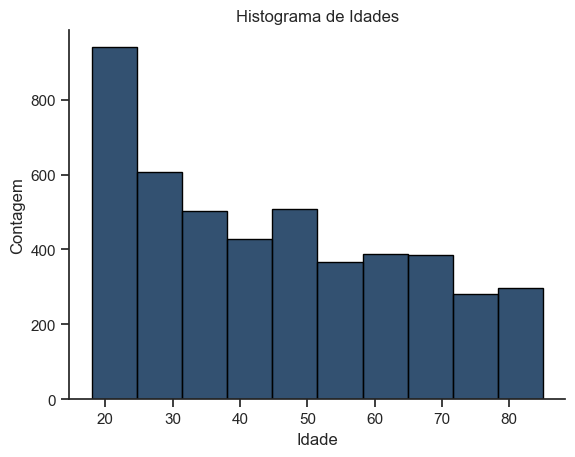

In [227]:
sns.histplot(x='RIDAGEYR', data=df_unido, bins=10, alpha=0.8, palette=custom_palette, edgecolor='black')

plt.title('Histograma de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Removendo Grid
plt.grid(False)

sns.despine(right=True)

In [228]:
df_unido['RIDAGEYR'].describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

- Maior quantidade de idades são até 20 anos;
- Distribuição relativamente uniforme;
- A média e mediana são próximas (44.91 e 43, repesctivamente);
- O menor valor é 18 e o maior 85.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/215346677.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='DPQ_SCORE', data=df_unido, bins=20, edgecolor='black', alpha=0.8, palette= custom_palette)


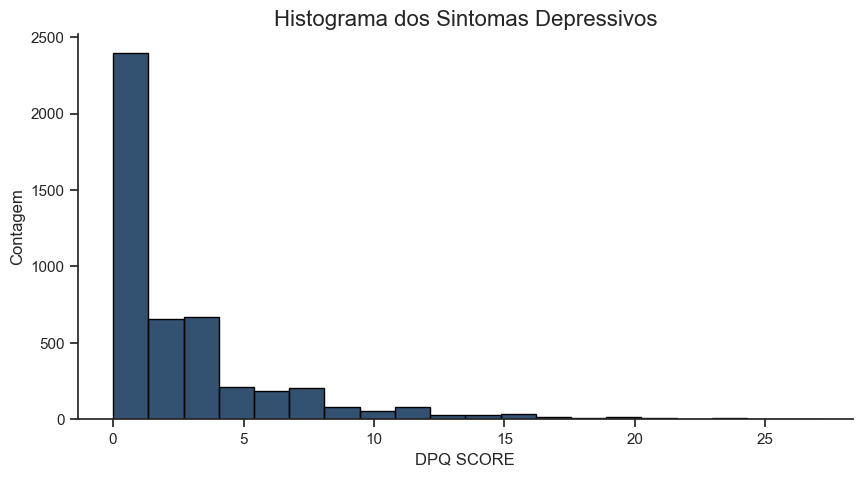

In [229]:
# Criação do histograma
plt.figure(figsize=(10, 5))
sns.histplot(x='DPQ_SCORE', data=df_unido, bins=20, edgecolor='black', alpha=0.8, palette= custom_palette)

# Adiciona título e rótulos dos eixos
plt.title('Histograma dos Sintomas Depressivos', fontsize=16)
plt.xlabel('DPQ SCORE', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Removendo borda a direita
sns.despine(right= True)

# Retira a grade
plt.grid(False)

In [230]:
df_unido['DPQ_SCORE'].describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: DPQ_SCORE, dtype: float64

- A dispersão representa uma distribuição assimétrica à direita;
- A média e mediana apresentam valores distantes (2.73 e 1, respectivamente);
- A quantidade de dados está principalmente entre 0 e 5. O que indica que a maioria possui baixos sintomas depressivos;
- O menor valor é 0 e o maior é 27.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/3401152105.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, edgecolor= 'black', alpha=0.8, palette=custom_palette)


Text(0, 0.5, 'Contagem')

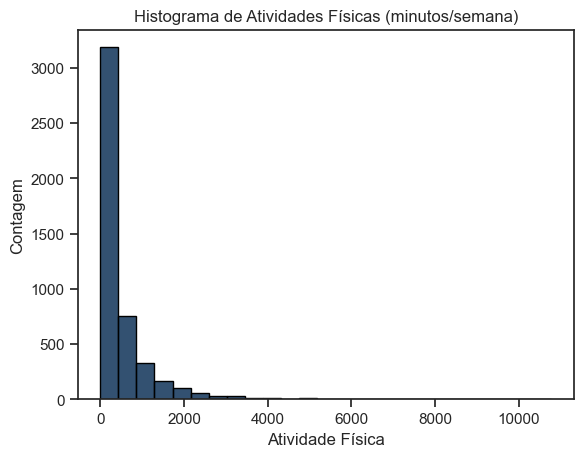

In [231]:
sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, edgecolor= 'black', alpha=0.8, palette=custom_palette)
plt.title('Histograma de Atividades Físicas (minutos/semana)')
plt.xlabel('Atividade Física')
plt.ylabel('Contagem')

Possui uma distribuição assimétrica à direita, porém alguns valores extremos, será verificado através do "describe".

In [232]:
df_unido['PAG_MINW'].describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

O valor máximo é um outlier impossível, ou seja, durante 7 dias, é impossível se exercitar 10777.82 minutos, visto que a semana possui apenas 10080 minutos.

Irei considerar que uma pessoa faça no máximo 10h/dia de exercício, será convertido os valores acima de 4200 para 4200 (10h/dia).

In [233]:
df_unido['PAG_MINW'] = np.where(df_unido['PAG_MINW']> 4200, 4200, df_unido['PAG_MINW'])

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/3401152105.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, edgecolor= 'black', alpha=0.8, palette=custom_palette)


Text(0, 0.5, 'Contagem')

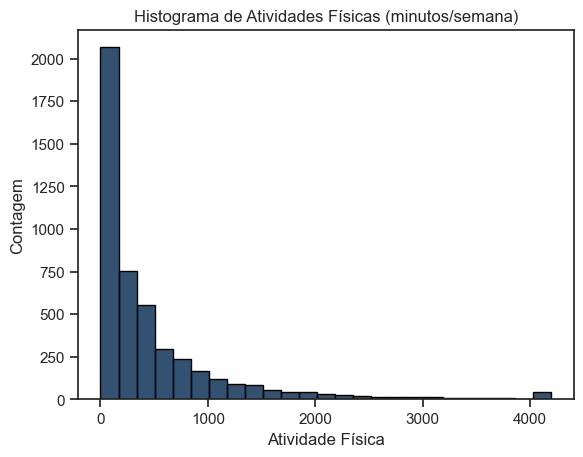

In [234]:
sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, edgecolor= 'black', alpha=0.8, palette=custom_palette)
plt.title('Histograma de Atividades Físicas (minutos/semana)')
plt.xlabel('Atividade Física')
plt.ylabel('Contagem')

In [235]:
df_unido['PAG_MINW'].describe()

count    4702.000000
mean      471.812030
std       695.673720
min         0.000000
25%        41.570439
50%       221.709007
75%       581.986143
max      4200.000000
Name: PAG_MINW, dtype: float64

* Com a assimetria à direita, pode-se presumir que a maior parte da amostra pratica menos que 2000 minutos por semana (33h semanais ou 4,76h diárias)

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/1620998074.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='HEI2015_TOTAL_SCORE', data=df_unido, edgecolor='black', alpha= 0.8, kde=True, palette=custom_palette)


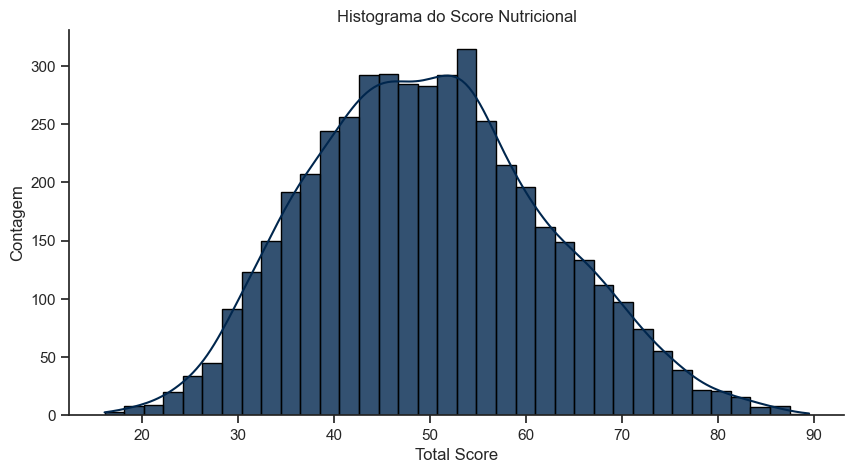

In [236]:
# Criação do histograma
plt.figure(figsize=(10, 5))
sns.histplot(x='HEI2015_TOTAL_SCORE', data=df_unido, edgecolor='black', alpha= 0.8, kde=True, palette=custom_palette)

# Adiciona título e rótulos dos eixos
plt.title('Histograma do Score Nutricional')
plt.xlabel('Total Score')
plt.ylabel('Contagem')

plt.grid(False)

sns.despine(right= True)

In [237]:
df_unido['HEI2015_TOTAL_SCORE'].describe()

count    4702.000000
mean       49.930071
std        12.345400
min        16.059212
25%        40.930960
50%        49.457583
75%        58.060844
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

- A distribuição se aproxima de uma distribuição normal;
- A média e mediana estão próximas;
- Possuem mais valores entre 40 e 60 score;
- O menor valor é 16.05 e o maior é 89.52. 


## **Análise Exploratória - Bivariada**

In [238]:
df_unido.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_SCORE', 'DEPRESSION_CATEGORY', 'PAG_MINW',
       'ADHERENCE', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

### **Variáveis Categóricas**

Gênero,
RIAGENDR


Etnia,
RIDRETH1

Grau de escolaridade,
DMDEDUC

Renda,
INDFMINC

Categoria de sintomas depressivos,
DEPRESSION_CATEGORY 

Atividades físicas por semana,
ADHERENCE

**Variáveis que serão comparadas**

* Gênero e grau de escolaridade;

* Gênero e renda;

* Gênero e categoria de sintomas depressivos;

* Etnia e grau de escolaridade;

* Etnia e renda;

* Etnia e categoria de sintomas depressivos;

* Grau de escolaridade e categoria de sintomas depressivos;

* Renda e Categoria de sintomas depressivos;


#### **Gênero e Grau de Escolaridade**

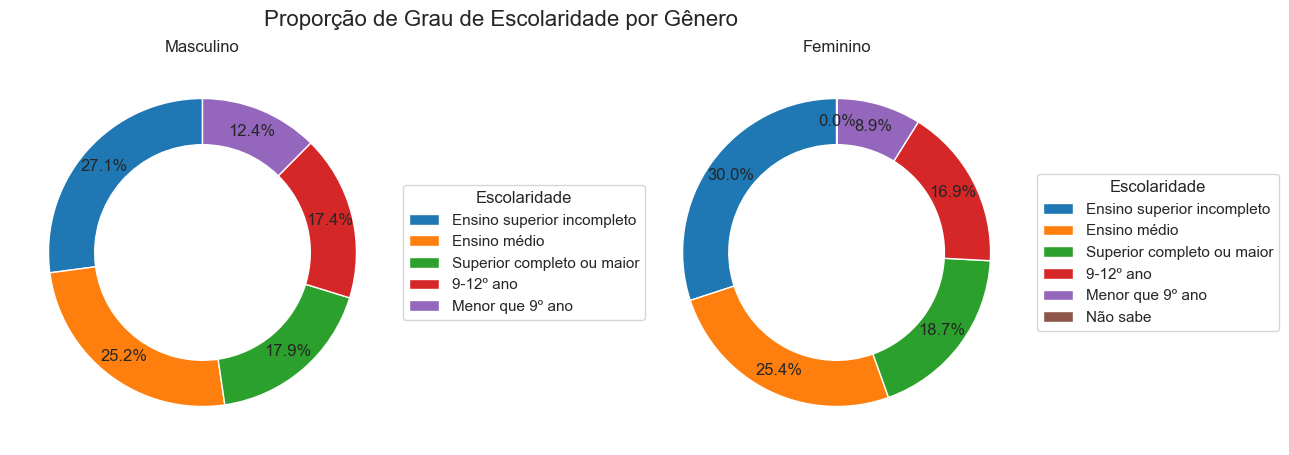

In [292]:
# Selecionando apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'DMDEDUC']].copy()

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Masculino']
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Feminino']

# Contando a quantidade de pessoas por grau de escolaridade para cada gênero
contagem_masculina = dados_masculinos['DMDEDUC'].value_counts()
contagem_feminina = dados_femininos['DMDEDUC'].value_counts()

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
    'colors': plt.cm.tab10.colors  # Especificando a paleta de cores   
}

# Gráfico de donut para o gênero masculino
axes[0].pie(contagem_masculina, labels=None, **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(contagem_masculina.index, title='Escolaridade', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
axes[1].pie(contagem_feminina, labels=None, **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(contagem_feminina.index, title='Escolaridade', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Grau de Escolaridade por Gênero', fontsize=16)
plt.show()


##### **1. Existe associação entre gênero e grau de escolaridade?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [240]:
# Tabela de contingência
contingency_table = pd.crosstab(df_unido['RIAGENDR'], df_unido['DMDEDUC'])

# Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre o gênero e o grau de escolaridade.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre o gênero e o grau de escolaridade.")


Estatística qui-quadrado: 18.880052780225615
Valor-p: 0.0020235560731163287
Coeficiente de Cramér: 0.0633665831332318
Há evidências de que existe associação entre o gênero e o grau de escolaridade.


#### **Gênero e Renda**

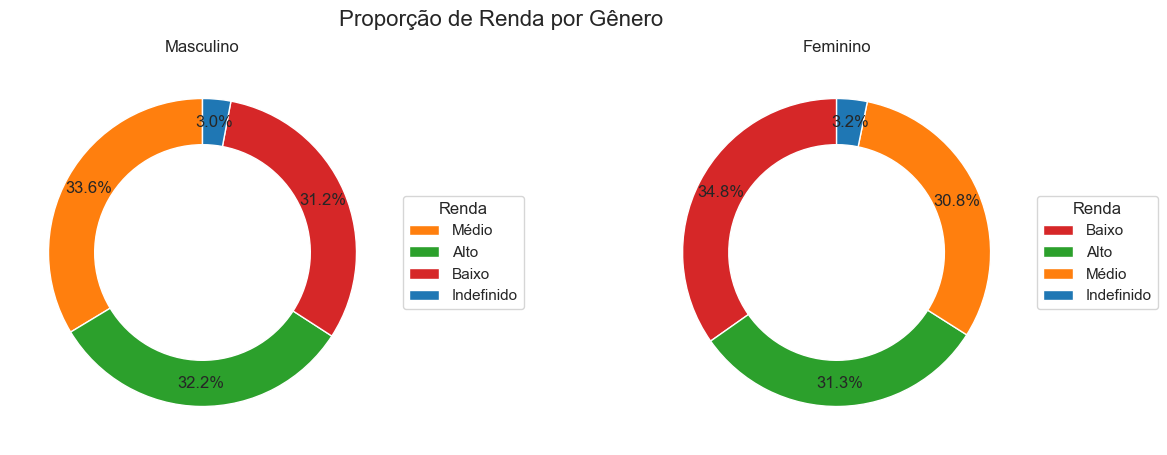

In [241]:
# Vamos selecionar apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'INDFMINC']].copy()

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Masculino']
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Feminino']

# Contando a quantidade de pessoas por renda para cada gênero
contagem_masculina = dados_masculinos['INDFMINC'].value_counts()
contagem_feminina = dados_femininos['INDFMINC'].value_counts()

# Cores para as categorias de renda
cores_renda = {
    'Baixo': '#d62728',  # Vermelho
    'Médio': '#ff7f0e',  # Laranja
    'Alto': '#2ca02c',   # Verde
    'Indefinido': '#1f77b4'  # Azul
}

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
}

# Gráfico de donut para o gênero masculino
patches, texts, _ = axes[0].pie(contagem_masculina, labels=None, colors=[cores_renda[c] for c in contagem_masculina.index], **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(patches, contagem_masculina.index, title='Renda', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
patches, texts, _ = axes[1].pie(contagem_feminina, labels=None, colors=[cores_renda[c] for c in contagem_feminina.index], **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(patches, contagem_feminina.index, title='Renda', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Renda por Gênero', fontsize=16)
plt.show()


##### **2. Existe associação entre o gênero e a renda?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [242]:
# Tabela de contingência
contingency_table = pd.crosstab(df_unido['RIAGENDR'], df_unido['INDFMINC'])

chi2,p,_,_ = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre gênero e renda.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre gênero e renda.")

Estatística qui-quadrado: 8.13681933827629
Valor-p: 0.043267093336986306
Coeficiente de Cramér: 0.04159930015453051
Há evidências de que existe associação entre gênero e renda.


#### **Gênero e Categoria de Sintomas Depressivos**

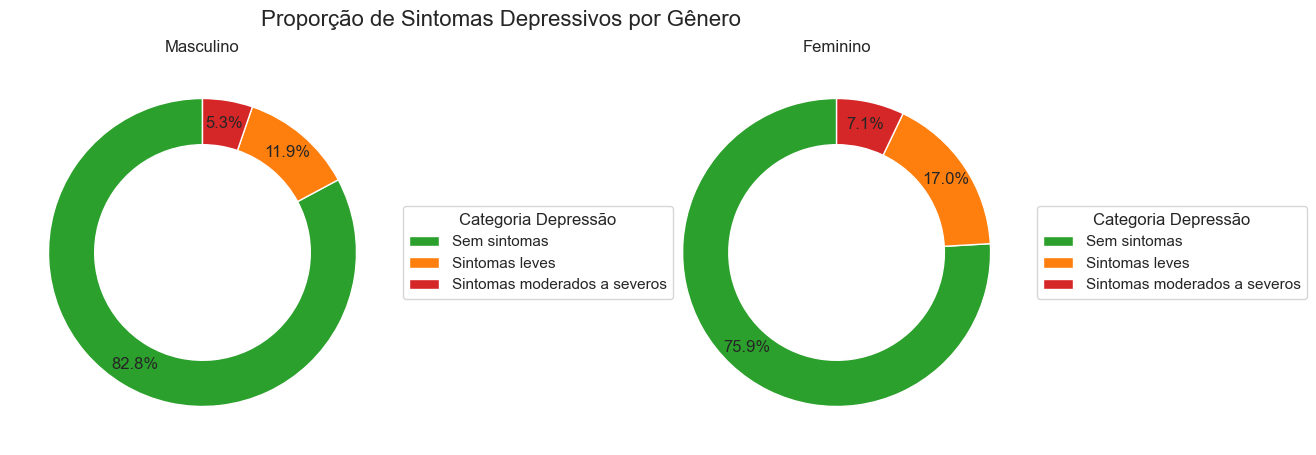

In [243]:
# Vamos selecionar apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'DEPRESSION_CATEGORY']].copy()

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Masculino']
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 'Feminino']

# Contando a quantidade de pessoas por renda para cada gênero
contagem_masculina = dados_masculinos['DEPRESSION_CATEGORY'].value_counts()
contagem_feminina = dados_femininos['DEPRESSION_CATEGORY'].value_counts()

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
}

# Cores para as categorias de depressão
cores_depressao = {
    'Sem sintomas': '#2ca02c',   # Verde
    'Sintomas leves': '#ff7f0e',  # Laranja
    'Sintomas moderados a severos': '#d62728',  # Vermelho
}

# Gráfico de donut para o gênero masculino
patches, texts, _ = axes[0].pie(contagem_masculina, labels=None, colors=[cores_depressao[c] for c in contagem_masculina.index], **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(patches, contagem_masculina.index, title='Categoria Depressão', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
patches, texts, _ = axes[1].pie(contagem_feminina, labels=None, colors=[cores_depressao[c] for c in contagem_feminina.index], **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(patches, contagem_feminina.index, title='Categoria Depressão', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Sintomas Depressivos por Gênero', fontsize=16)
plt.show()


##### **3. Existe associação entre o gênero e a categoria dos sintomas depressivos?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [244]:
# Tabela de contingência
contingency_table = pd.crosstab(df_unido['RIAGENDR'], df_unido['DEPRESSION_CATEGORY'])

chi2,p,_,_ = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre gênero e categoria de sintomas depressivos.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre gênero e categoria de sintomas depressivos.")

Estatística qui-quadrado: 34.237541499318844
Valor-p: 3.676311700517295e-08
Coeficiente de Cramér: 0.0853316166116636
Há evidências de que existe associação entre gênero e categoria de sintomas depressivos.


#### **Etnia e grau de escolaridade**

RIDRETH1 e  DMDEDUC

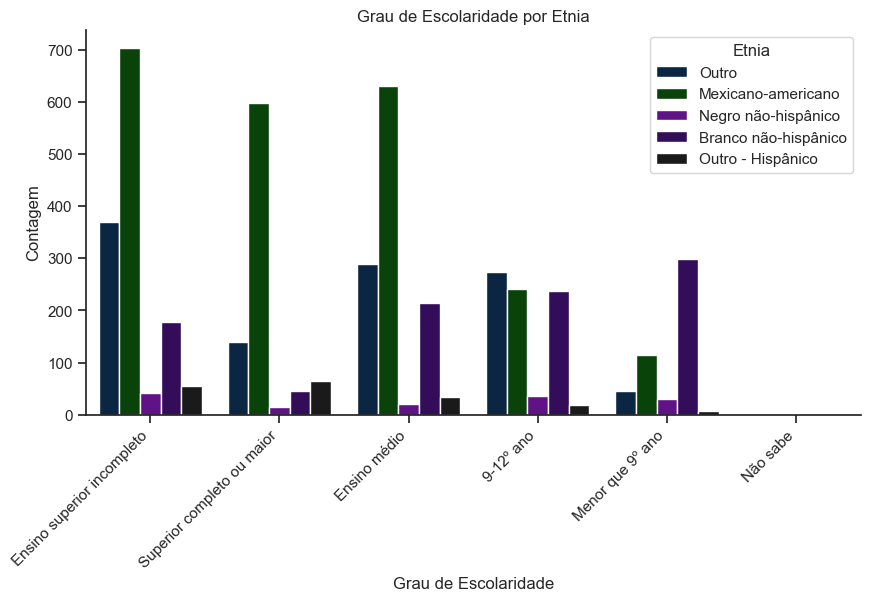

In [245]:
plt.figure(figsize=(10,5))
plt.title('Grau de Escolaridade por Etnia')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
sns.despine(right= True)
sns.countplot(x= 'DMDEDUC', data=df_unido, hue='RIDRETH1', palette=custom_palette)
plt.legend(title='Etnia')

##### **4. Existe associação entre grau de escolaridade e etinia?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [246]:
contingency_table = pd.crosstab(df_unido['RIDRETH1'], df_unido['DMDEDUC'])

chi2, p, _, _ = chi2_contingency(contingency_table) 

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre etnia e categoria de grau de escolaridade.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre etnia e grau de escolaridade.")

Estatística qui-quadrado: 937.3671187796466
Valor-p: 8.707092802883015e-186
Coeficiente de Cramér: 0.22324592974994506
Há evidências de que existe associação entre etnia e categoria de grau de escolaridade.


#### **Etnia e renda**

Etnia,
RIDRETH1

Renda,
INDFMINC



/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/2139688603.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='RIDRETH1', data=df_unido, hue='INDFMINC', legend=True, palette=custom_palette, alpha=1)


Text(0, 0.5, 'Contagem')

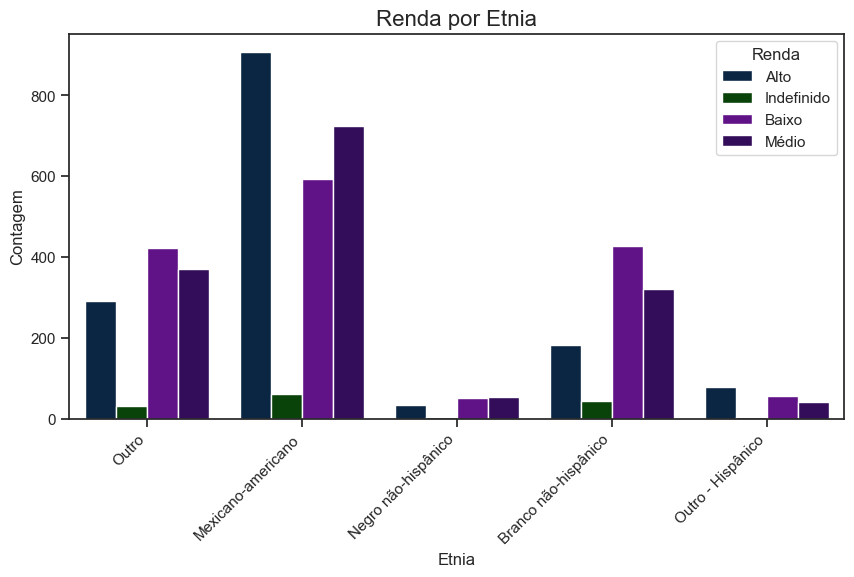

In [247]:
plt.figure(figsize=(10,5))
sns.countplot(x='RIDRETH1', data=df_unido, hue='INDFMINC', legend=True, palette=custom_palette, alpha=1)
plt.xticks(rotation = 45, ha= 'right')
plt.legend(title= 'Renda')
plt.title('Renda por Etnia', fontsize=16)
plt.xlabel('Etnia')
plt.ylabel('Contagem')

##### **5. Existe associação entre etnia e renda?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [248]:
contingency_table = pd.crosstab(df_unido['RIDRETH1'], df_unido['INDFMINC'])

chi2, p, _, _ = chi2_contingency(contingency_table) 

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre etnia e renda.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre etnia e renda.")

Estatística qui-quadrado: 213.4125199545211
Valor-p: 5.5012944574005014e-39
Coeficiente de Cramér: 0.12300082013910732
Há evidências de que existe associação entre etnia e renda.


#### **Etnia e categoria de sintomas depressivos**

Etnia,
RIDRETH1

Categoria de sintomas depressivosAtividades,
DEPRESSION_CATEGORY 


/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/383310630.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='RIDRETH1', data=df_unido, hue='DEPRESSION_CATEGORY', palette=custom_palette)


Text(0, 0.5, 'Contagem')

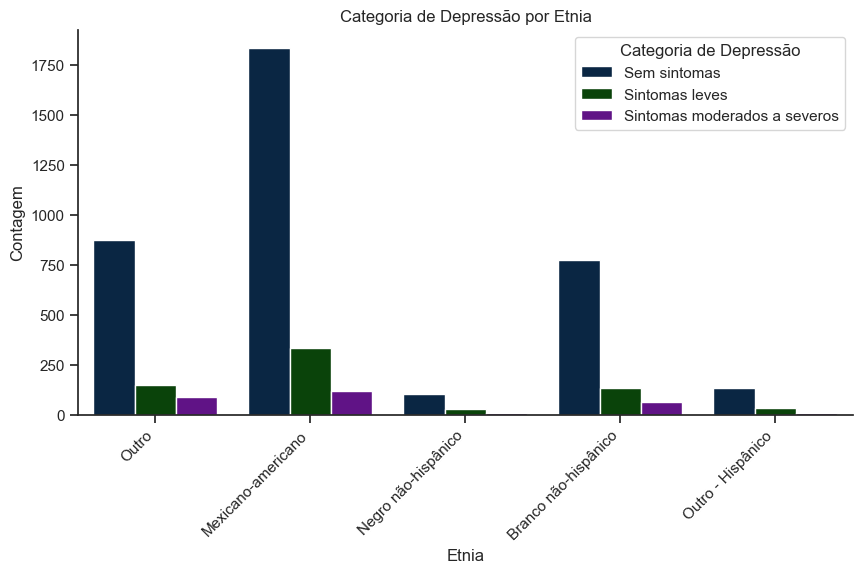

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(x='RIDRETH1', data=df_unido, hue='DEPRESSION_CATEGORY', palette=custom_palette)
plt.xticks(rotation= 45, ha='right')
sns.despine(right=(True))
plt.legend(title='Categoria de Depressão')
plt.title('Categoria de Depressão por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Contagem')

##### **6. Existe associação entre etnia e categoria de depressão?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [250]:
contingency_table = pd.crosstab(df_unido['RIDRETH1'], df_unido['DEPRESSION_CATEGORY'])

chi2, p, _, _ = chi2_contingency(contingency_table) 

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre etnia e categoria de depressão.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre etnia e categoria de depressão.")

Estatística qui-quadrado: 20.559681918875665
Valor-p: 0.008413786271703388
Coeficiente de Cramér: 0.04675756491230778
Há evidências de que existe associação entre etnia e categoria de depressão.


##### **Grau de escolaridade e categoria de sintomas depressivos**

Grau de escolaridade,
DMDEDUC

Categoria de sintomas depressivos,
DEPRESSION_CATEGORY 

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/3825070118.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='DMDEDUC', data=df_unido, hue= 'DEPRESSION_CATEGORY', palette=custom_palette)


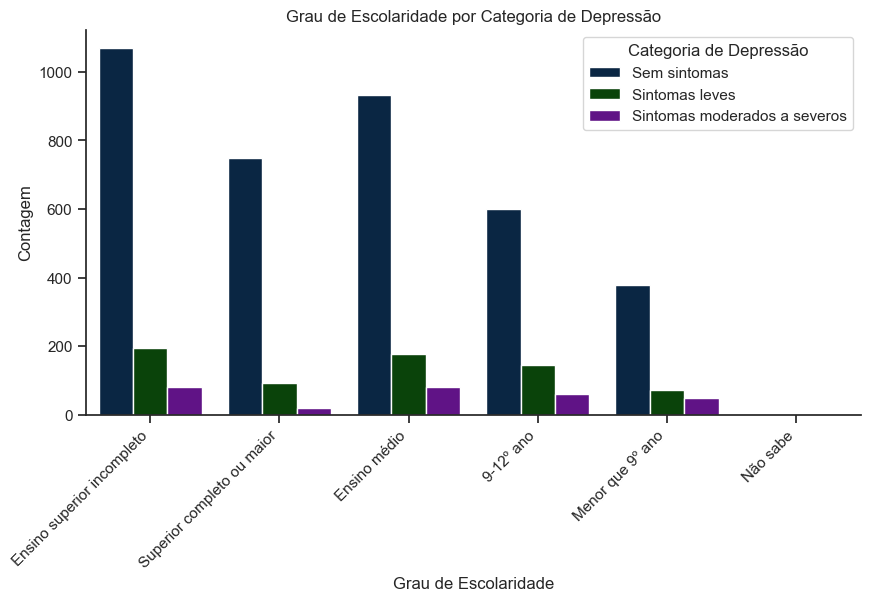

In [251]:
plt.figure(figsize=(10,5))
sns.countplot(x='DMDEDUC', data=df_unido, hue= 'DEPRESSION_CATEGORY', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.legend(title= 'Categoria de Depressão')
plt.title('Grau de Escolaridade por Categoria de Depressão')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Contagem')
sns.despine(right=True)

#### **7. Existe associação entre grau de escolaridade e categoria de sintomas depressivos?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [252]:
contingency_table = pd.crosstab(df_unido['DMDEDUC'], df_unido['DEPRESSION_CATEGORY'])

chi2, p, _, _ = chi2_contingency(contingency_table) 

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre grau de escolaridade e categoria de depressão.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre grau de escolaridade e categoria de depressão.")

Estatística qui-quadrado: 60.92849125192959
Valor-p: 2.4173706473636336e-09
Coeficiente de Cramér: 0.08049221930315006
Há evidências de que existe associação entre grau de escolaridade e categoria de depressão.


##### **Renda e Categoria de sintomas depressivos**

Renda,
INDFMINC

Categoria de sintomas depressivos,
DEPRESSION_CATEGORY 

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_1363/512501244.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x= 'INDFMINC', data= df_unido, hue= 'DEPRESSION_CATEGORY', palette=custom_palette)


Text(0, 0.5, 'Contagem')

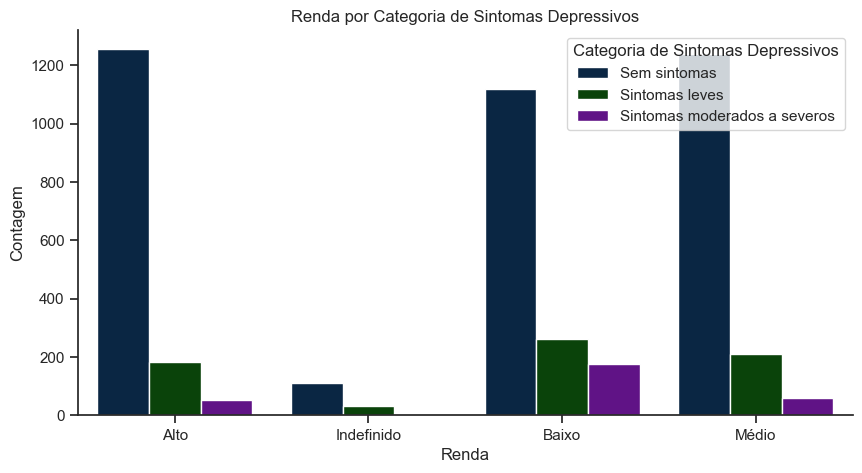

In [253]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'INDFMINC', data= df_unido, hue= 'DEPRESSION_CATEGORY', palette=custom_palette)
sns.despine(right=True)
plt.legend(title= 'Categoria de Sintomas Depressivos')
plt.title('Renda por Categoria de Sintomas Depressivos')
plt.xlabel('Renda')
plt.ylabel('Contagem')

#### **8. Existe associação entre renda e categoria de sintomas depressivos?**

Será realizado um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [254]:
contingency_table = pd.crosstab(df_unido['INDFMINC'], df_unido['DEPRESSION_CATEGORY'])

chi2, p, _, _ = chi2_contingency(contingency_table) 

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que existe associação entre grau de escolaridade e categoria de depressão.")
else:
    print("Não há evidências suficientes para concluir que existe associação entre grau de escolaridade e categoria de depressão.")

Estatística qui-quadrado: 128.65339352443485
Valor-p: 2.4690149120983184e-25
Coeficiente de Cramér: 0.11696456577712043
Há evidências de que existe associação entre grau de escolaridade e categoria de depressão.


### **Variáveis Numéricas**

Idade, RIDAGEYR

Sintomas Depressivos, DPQ_SCORE

Atividade Física (min/semana), PAG_MINW

Score Nutricional, HEI2015_TOTAL_SCORE

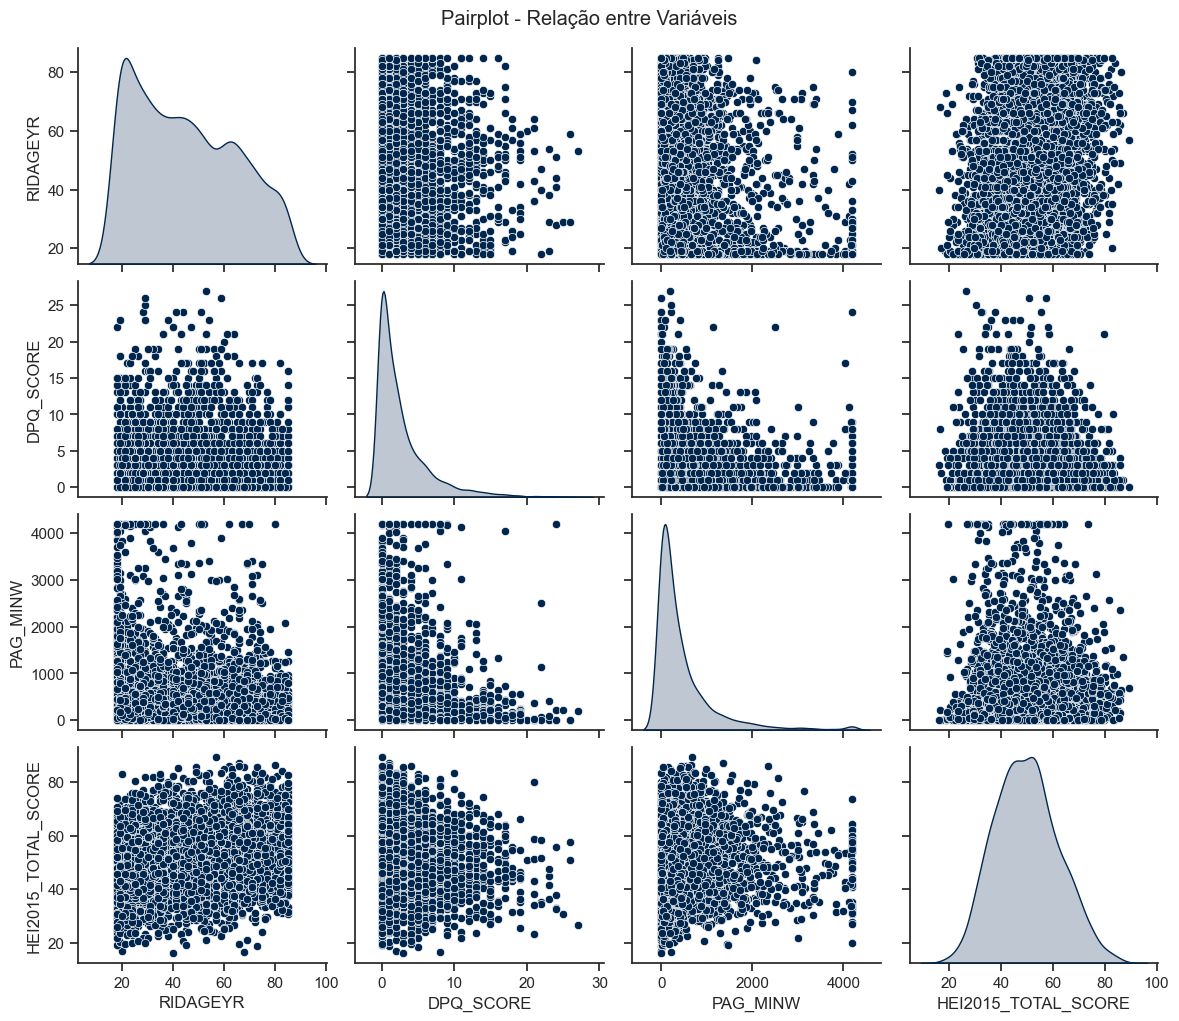

In [255]:
# Selecionar as colunas relevantes
df_plot = df_unido[['RIDAGEYR', 'DPQ_SCORE', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']]

# Definir estilo seaborn
sns.set(style="ticks", palette=custom_palette)

# Plotar o pairplot
g = sns.pairplot(df_plot, diag_kind='kde', markers='o', height=2.5, aspect=1.2)
plt.suptitle('Pairplot - Relação entre Variáveis', y=1.02)
plt.show()


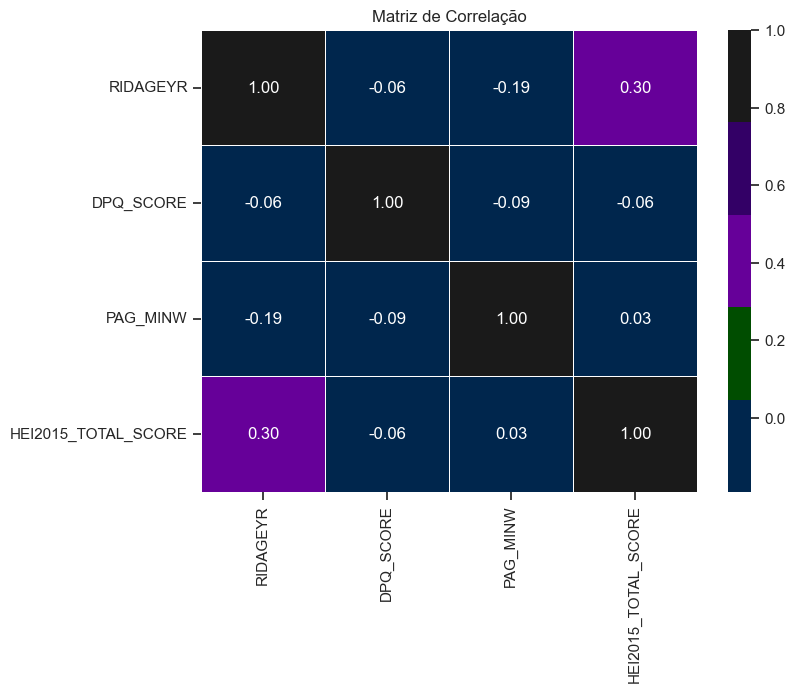

In [256]:
# Selecionar as colunas relevantes
correlacao = df_unido[['RIDAGEYR', 'DPQ_SCORE', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']]

# Calcular a matriz de correlação
correlation_matrix = correlacao.corr(method='spearman')

# Plotar o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


Parece existir uma correlação entre idade e score nutricional, além de uma correlação entre idade e tempo de atividade física por semana. Para se ter um resultado confiável, serão realizados testes de hipóteses.

##### **9. Existe correlação entre idade e score nutricional?**

**Significância: 0.05**

**H0: Não há correlação entre as variáveis.**

**Ha: Há correlação entre as variáveis.**

In [257]:
# Calcular a correlação de Spearman
corr_spearman, p_value = spearmanr(df_unido['RIDAGEYR'], df_unido['HEI2015_TOTAL_SCORE'])

print("Correlação de Spearman:", corr_spearman)
print("Valor p:", p_value)

if p_value < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita-se a hipótese nula.')

Correlação de Spearman: 0.29991582795903937
Valor p: 2.4651448595120624e-98
Rejeita-se a hipótese nula.


##### **10. Existe correlação entre idade e atividade física?**

**Significância: 0.05**

**H0: Não há correlação entre as variáveis.**

**Ha: Há correlação entre as variáveis.**

In [258]:
# Calcular a correlação de Spearman
corr_spearman, p_value = spearmanr(df_unido['RIDAGEYR'], df_unido['PAG_MINW'])

print("Correlação de Spearman:", corr_spearman)
print("Valor p:", p_value)

if p_value < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita-se a hipótese nula.')

Correlação de Spearman: -0.19031583160716684
Valor p: 1.3549851730865211e-39
Rejeita-se a hipótese nula.


### **Variáveis Categóricas e Numéricas**

**Categóricas**

Gênero,
RIAGENDR


Etnia,
RIDRETH1

Grau de escolaridade,
DMDEDUC

Renda,
INDFMINC

Categoria de sintomas depressivos,
DEPRESSION_CATEGORY 

Atividades físicas por semana,
ADHERENCE

**Numéricas**

Idade, RIDAGEYR

Sintomas Depressivos, DPQ_SCORE

Atividade Física (min/semana), PAG_MINW

Score Nutricional, HEI2015_TOTAL_SCORE

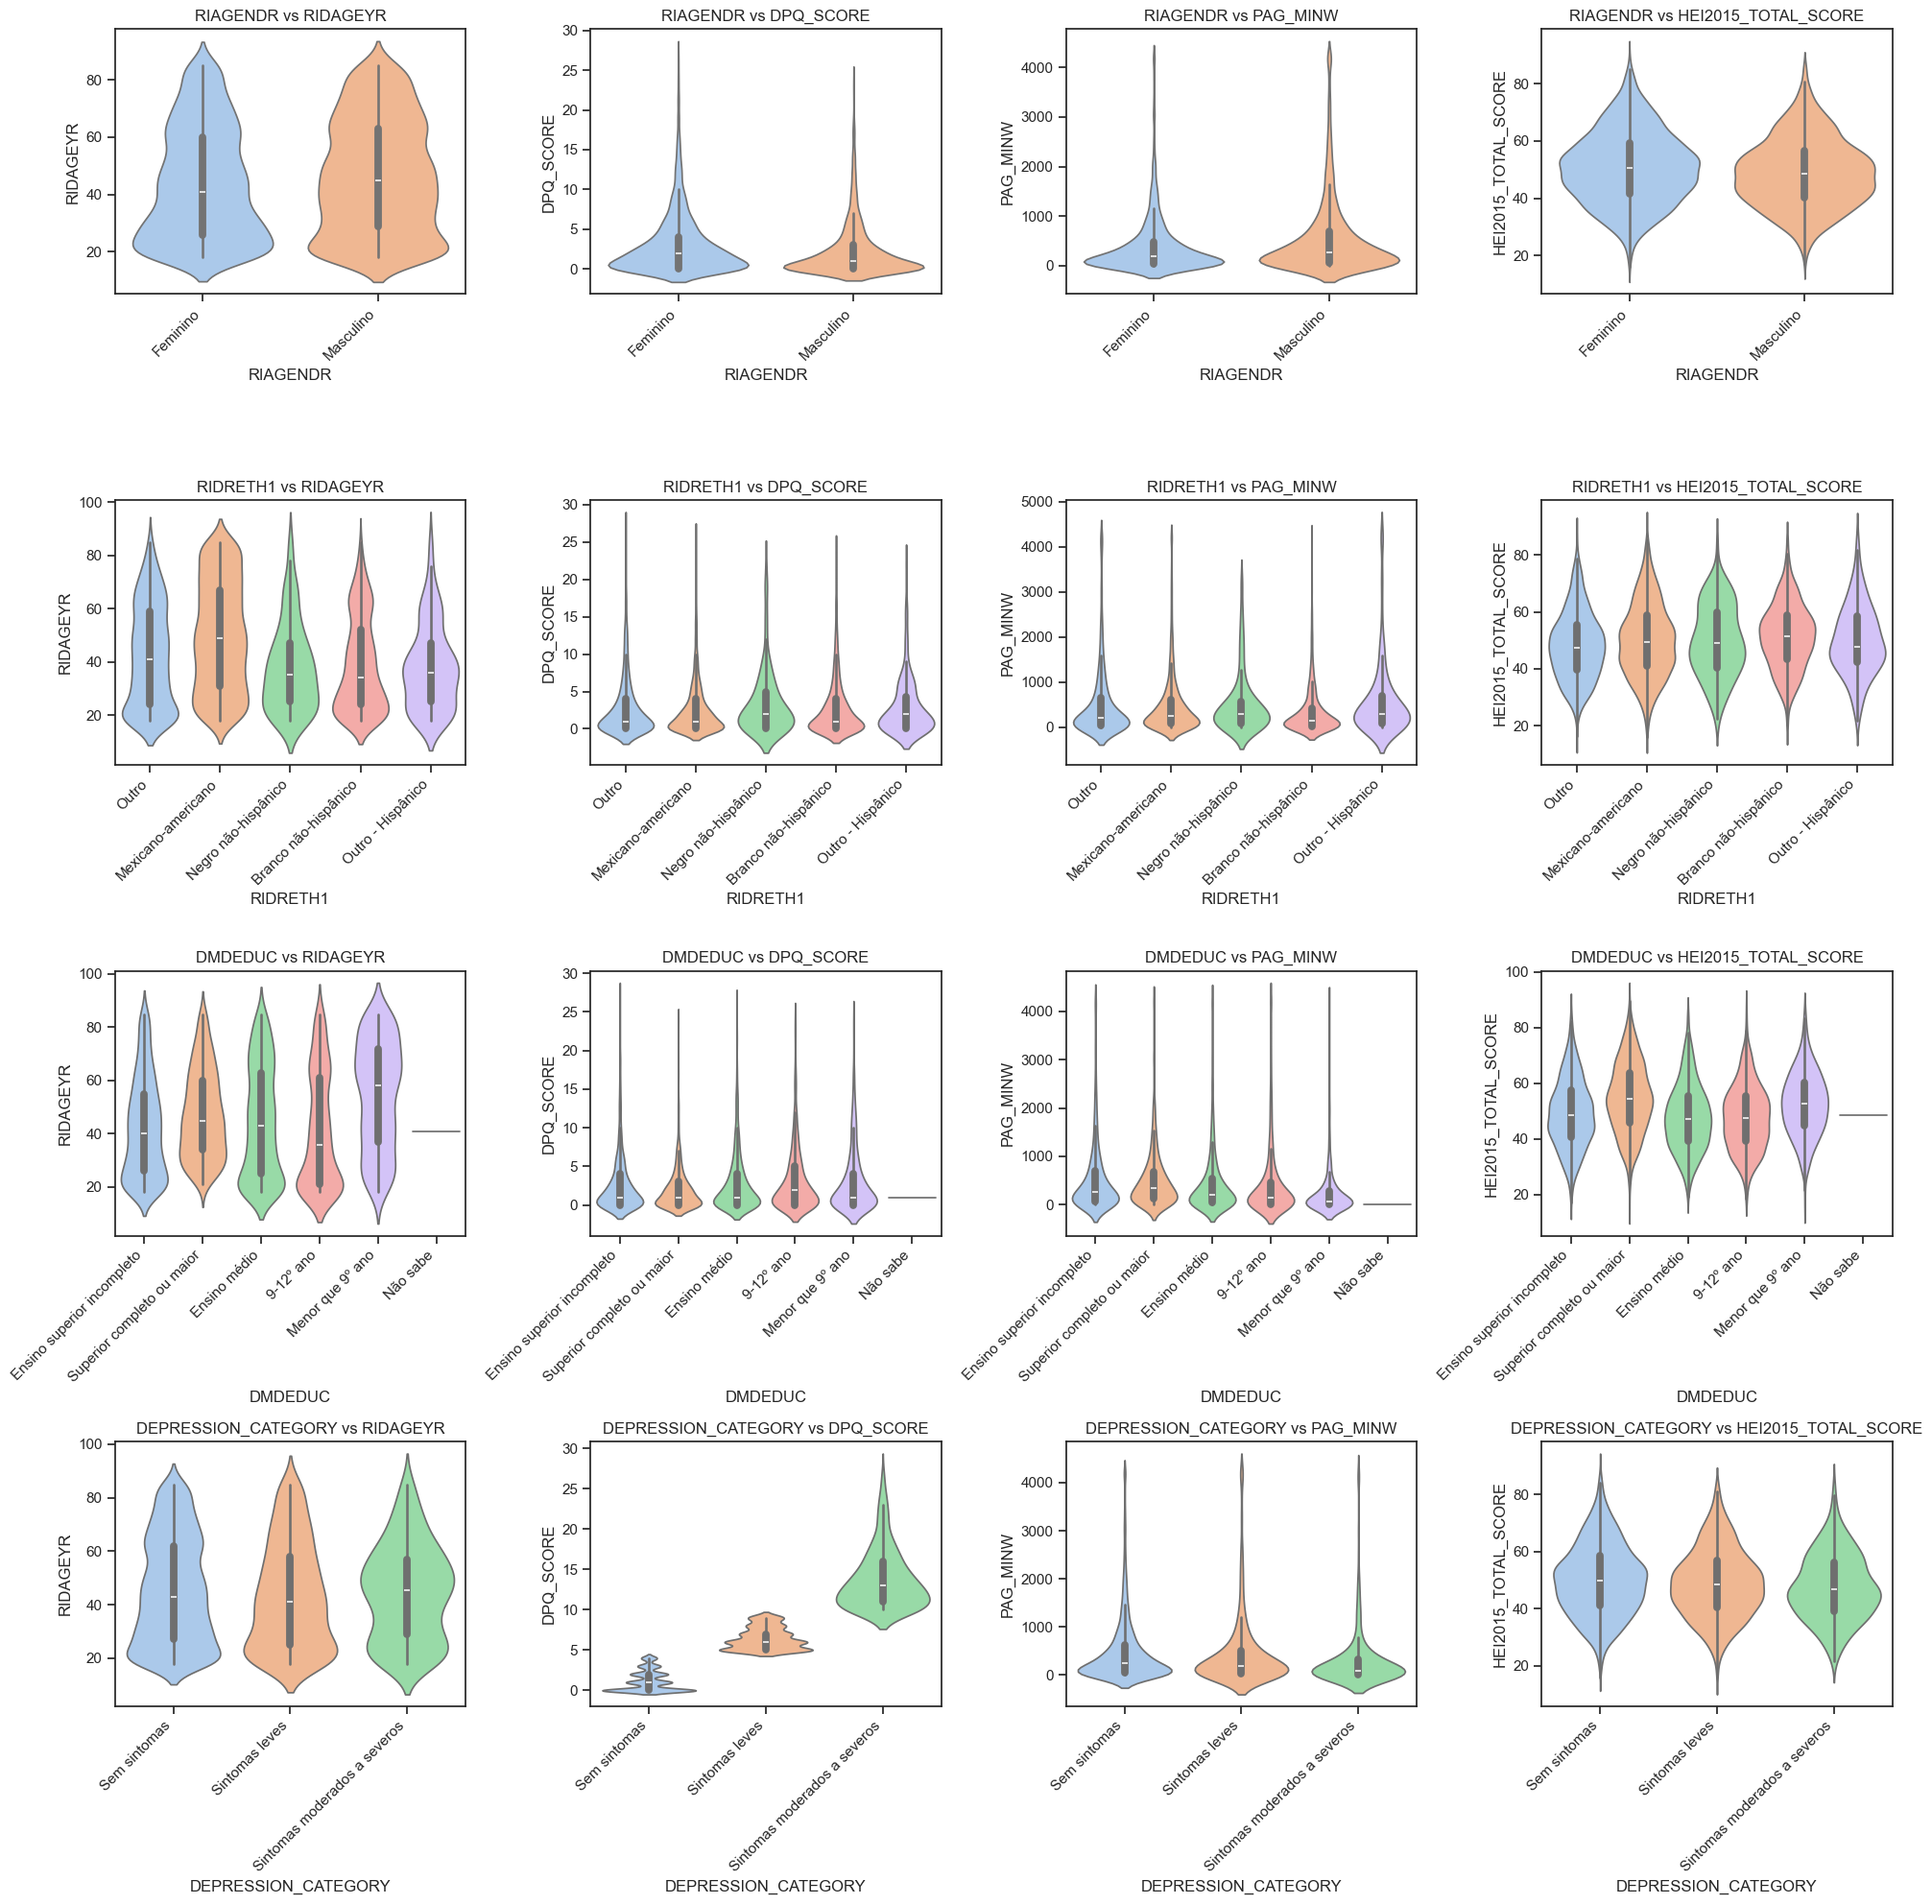

In [259]:
# Define as variáveis categóricas
categorical_vars = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'DEPRESSION_CATEGORY']

# Define as variáveis numéricas
numeric_vars = ['RIDAGEYR', 'DPQ_SCORE', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']

# Criação da grade de subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Loop sobre as combinações e cria os gráficos
for i, cat_var in enumerate(categorical_vars):
    for j, num_var in enumerate(numeric_vars):
        sns.violinplot(x=cat_var, y=num_var, data=df_unido, ax=axes[i, j], palette='pastel', hue=cat_var, legend=False)
        axes[i, j].set_title(f'{cat_var} vs {num_var}')
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()


### **Testes de Hipótese com DPQ_SCORE**

Serão realizados uma série de testes de hipótese, com intuito de identificar os fatores que podem impactar o nível de sintomas depressivos.

**Categóricas**

Gênero,
RIAGENDR


Etnia,
RIDRETH1

Grau de escolaridade,
DMDEDUC

Renda,
INDFMINC

Categoria de sintomas depressivos,
DEPRESSION_CATEGORY 

Atividades físicas por semana,
ADHERENCE


**Numéricas**

Idade, RIDAGEYR

Sintomas Depressivos, DPQ_SCORE

Atividade Física (min/semana), PAG_MINW

Score Nutricional, HEI2015_TOTAL_SCORE

#### **Sintomas Depressivos e Gênero**

##### **1) Existe diferença para as médias de DPQ_SCORE entre os gêneros?**

In [260]:
dados_masculinos = df_unido['DPQ_SCORE'].loc[dados_unificados_subconjunto['RIAGENDR'] == 'Masculino']
dados_femininos = df_unido['DPQ_SCORE'].loc[dados_unificados_subconjunto['RIAGENDR'] == 'Feminino']

In [261]:
dados_masculinos.mean().round(2)

2.31

In [262]:
dados_femininos.mean().round(2)

3.13

Na média os valores são bem diferentes. Enquanto o sexo masculino possui uma média de 2.31 no DPQ_SCORE, o sexo feminino possui uma média de 3.13.
Portanto, será realizado teste de hipótese.

**Significância:** 0.05

**Hipótese Nula (H0):** A média do DPQ_SCORE para o sexo masculino é igual à média do DPQ_SCORE para o sexo feminino. **H0: μ1 = μ2**


**Hipótese Alternativa (Ha):** A média do DPQ_SCORE para o sexo masculino é diferente da média do DPQ_SCORE para o sexo feminino. **H1: μ1 ≠ μ2**

**Teste de Normalidade:** O mais comum é utilizar o teste T-student, porém existem algumas premissas que devem ser levadas em consideração, por exemplo, se os dados seguem uma distribuição normal. Será realizado um teste para verificar se os dados seguem uma normal.

In [263]:
stat_m, p_value_m = shapiro(dados_masculinos)
stat_f, p_value_f = shapiro(dados_femininos)

print("Resultado para o grupo masculino:")
print("Estatística de teste:", stat_m)
print("Valor-p:", p_value_m)
if p_value_m < 0.05:
    print('Os dados não seguem uma distribuição normal')
else:
    print('Os dados seguem uma distribuição normal')


print("\nResultado para o grupo feminino:")
print("Estatística de teste:", stat_f)
print("Valor-p:", p_value_f)
if p_value_f < 0.05:
    print('Os dados não seguem uma distribuição normal')
else:
    print('Os dados seguem uma distribuição normal')


Resultado para o grupo masculino:
Estatística de teste: 0.6945014366479356
Valor-p: 1.8863298204121594e-53
Os dados não seguem uma distribuição normal

Resultado para o grupo feminino:
Estatística de teste: 0.7568422719499894
Valor-p: 5.641858537775907e-51
Os dados não seguem uma distribuição normal


Como os dados não seguem uma distribuição normal, será realizado o teste U de Mann-Whitney (Wilcoxon-Mann-Whitney)

In [264]:
# Executar o teste U de Mann-Whitney
statistic, p_value = mannwhitneyu(dados_masculinos, dados_femininos)

# Imprimir os resultados
print("Estatística do teste U de Mann-Whitney:", statistic)
print("Valor-p:", p_value)

# Interpretar os resultados
if p_value < 0.05:
    print("Há uma diferença significativa entre as duas amostras.")
else:
    print("Não há evidências de uma diferença significativa entre as duas amostras.")

Estatística do teste U de Mann-Whitney: 2316389.0
Valor-p: 1.4490166191941684e-22
Há uma diferença significativa entre as duas amostras.


Será calculado o intervalo de confiança com Bootstrap

O uso do bootstrap neste contexto nos permite calcular intervalos de confiança robustos para as médias do DPQ_SCORE para homens e mulheres, sem fazer suposições sobre a distribuição dos dados.

In [265]:
# Função para calcular a média das amostras bootstrap
def bootstrap_mean(data, n_bootstraps):
    means = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(data, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        means.append(bootstrap_mean)
    return np.array(means)

# Número de amostras bootstrap
n_bootstraps = 1000

# Calcular a média das amostras bootstrap para o sexo masculino
means_masculino = bootstrap_mean(dados_masculinos, n_bootstraps)

# Calcular o intervalo de confiança para a média do sexo masculino
lower_bound_masculino = np.percentile(means_masculino, 2.5)
upper_bound_masculino = np.percentile(means_masculino, 97.5)

# Calcular a média das amostras bootstrap para o sexo feminino
means_feminino = bootstrap_mean(dados_femininos, n_bootstraps)

# Calcular o intervalo de confiança para a média do sexo feminino
lower_bound_feminino = np.percentile(means_feminino, 2.5)
upper_bound_feminino = np.percentile(means_feminino, 97.5)

# Imprimir os resultados
print("Intervalo de Confiança para a Média do Sexo Masculino:", (lower_bound_masculino, upper_bound_masculino))
print("Intervalo de Confiança para a Média do Sexo Feminino:", (lower_bound_feminino, upper_bound_feminino))


Intervalo de Confiança para a Média do Sexo Masculino: (2.1733885209713026, 2.4596467991169977)
Intervalo de Confiança para a Média do Sexo Feminino: (2.981114074681986, 3.279052113254001)


Observando os intervalos de confiança, podemos ver que não há sobreposição entre os intervalos de confiança para as médias do DPQ_SCORE entre os dois grupos (masculino e feminino). Isso sugere que há uma diferença significativa entre as médias do DPQ_SCORE entre homens e mulheres.

#### **Etnia e DPQ_SCORE**

##### **2) A etnia interfere no DPQ_SCORE?** 

In [266]:
df_unido['RIDRETH1'].value_counts()

RIDRETH1
Mexicano-americano      2288
Outro                   1116
Branco não-hispânico     975
Outro - Hispânico        180
Negro não-hispânico      143
Name: count, dtype: int64

**Significância:** 0.05

**Hipótese Nula (H0):** Não há diferença significativa nos DPQ_SCOREs entre as diferentes etnias.

**Hipótese Alternativa (H1):** Há diferença significativa nos DPQ_SCOREs entre as diferentes etnias.

In [267]:
# Separando os dados por etnia
mexicano_americano = df_unido['DPQ_SCORE'].loc[df_unido['RIDRETH1']== 'Mexicano-americano']
outro = df_unido['DPQ_SCORE'].loc[df_unido['RIDRETH1']== 'Outro']
branco_nao_hispanico = df_unido['DPQ_SCORE'].loc[df_unido['RIDRETH1']== 'Branco não-hispânico']
outro_hispanico = df_unido['DPQ_SCORE'].loc[df_unido['RIDRETH1']== 'Outro - Hispânico']
negro_nao_hispanico = df_unido['DPQ_SCORE'].loc[df_unido['RIDRETH1']== 'Negro não-hispânico']

print(f'Média de DPQ_SCORE - Mexicano Americano: {mexicano_americano.mean().round(2)}')
print(f'Média de DPQ_SCORE - Outro: {outro.mean().round(2)}')
print(f'Média de DPQ_SCORE - Branco não hispânico: {branco_nao_hispanico.mean().round(2)}')
print(f'Média de DPQ_SCORE - Outro - hispânico: {outro_hispanico.mean().round(2)}')
print(f'Média de DPQ_SCORE - Negro não-hispânico: {negro_nao_hispanico.mean().round(2)}')

Média de DPQ_SCORE - Mexicano Americano: 2.6
Média de DPQ_SCORE - Outro: 2.89
Média de DPQ_SCORE - Branco não hispânico: 2.73
Média de DPQ_SCORE - Outro - hispânico: 2.88
Média de DPQ_SCORE - Negro não-hispânico: 3.4


Existe uma diferença entre as médias em relação às etnias. Será realizado um teste de hipótese.

O teste mais comum é a ANOVA. Porém, precisa-se verificar a homogeneidade das variâncias e a normalidade dos dados.

**Teste de Levene (Homogeneidade das Variâncias):**

**Significância:** 0.05


H0 (Hipótese Nula): As variâncias dos DPQ_SCOREs são iguais entre os diferentes grupos étnicos.


HA (Hipótese Alternativa): Pelo menos uma das variâncias dos DPQ_SCOREs difere entre os diferentes grupos étnicos.


In [268]:
# Teste de Levene para Homogeneidade das Variâncias
levene_test = levene(mexicano_americano, outro, branco_nao_hispanico, outro_hispanico, negro_nao_hispanico)
print("Resultado do teste de Levene para homogeneidade das variâncias:")
print("Estatística de Levene:", levene_test.statistic)
print("Valor p:", levene_test.pvalue)

Resultado do teste de Levene para homogeneidade das variâncias:
Estatística de Levene: 2.373654702278829
Valor p: 0.05001393488229327


**Testes de Shapiro-Wilk (Normalidade dos Dados):**

**Significância:** 0.05

**H0 (Hipótese Nula):** Os DPQ_SCOREs seguem uma distribuição normal dentro de cada grupo étnico.

**Ha (Hipótese Alternativa):** Os DPQ_SCOREs não seguem uma distribuição normal dentro de pelo menos um dos grupos étnicos.

In [269]:
# Teste de Shapiro-Wilk para Normalidade dos Dados
shapiro_test_mexicano_americano = shapiro(mexicano_americano)
shapiro_test_outro = shapiro(outro)
shapiro_test_branco_nao_hispanico = shapiro(branco_nao_hispanico)
shapiro_test_outro_hispanico = shapiro(outro_hispanico)
shapiro_test_negro_nao_hispanico = shapiro(negro_nao_hispanico)

print("\nResultados do teste de Shapiro-Wilk para normalidade dos dados:")
print("Mexicano Americano - Estatística de Shapiro:", shapiro_test_mexicano_americano.statistic, "Valor p:", shapiro_test_mexicano_americano.pvalue)
print("Outro - Estatística de Shapiro:", shapiro_test_outro.statistic, "Valor p:", shapiro_test_outro.pvalue)
print("Branco não Hispânico - Estatística de Shapiro:", shapiro_test_branco_nao_hispanico.statistic, "Valor p:", shapiro_test_branco_nao_hispanico.pvalue)
print("Outro - Hispânico - Estatística de Shapiro:", shapiro_test_outro_hispanico.statistic, "Valor p:", shapiro_test_outro_hispanico.pvalue)
print("Negro não Hispânico - Estatística de Shapiro:", shapiro_test_negro_nao_hispanico.statistic, "Valor p:", shapiro_test_negro_nao_hispanico.pvalue)



Resultados do teste de Shapiro-Wilk para normalidade dos dados:
Mexicano Americano - Estatística de Shapiro: 0.7310270414637815 Valor p: 1.7413637852585083e-51
Outro - Estatística de Shapiro: 0.717545363184025 Valor p: 9.69816286766748e-40
Branco não Hispânico - Estatística de Shapiro: 0.739082136466829 Valor p: 1.5892008143337477e-36
Outro - Hispânico - Estatística de Shapiro: 0.75538735212026 Valor p: 5.167174792054885e-16
Negro não Hispânico - Estatística de Shapiro: 0.7511440666345134 Valor p: 2.7642803459151908e-14


Como o valor p é marginalmente maior que 0.05, não podemos rejeitar completamente a hipótese nula de homogeneidade das variâncias. No entanto, é importante notar que o valor p está próximo do limite de significância, o que sugere uma possível violação da homogeneidade das variâncias.

Para todos os grupos étnicos, a estatística de Shapiro-Wilk é significativamente menor que 0.05, indicando uma forte evidência contra a normalidade dos dados. Isso sugere que os dados não seguem uma distribuição normal.

O teste de Kruskal-Wallis é uma alternativa não paramétrica à ANOVA que não requer normalidade dos dados ou igualdade de variâncias entre os grupos. Ele é usado para comparar as medianas de três ou mais grupos independentes.

In [270]:
print(f'Mediana de DPQ_SCORE - Mexicano Americano: {mexicano_americano.median().round(2)}')
print(f'Mediana de DPQ_SCORE - Outro: {outro.median().round(2)}')
print(f'Mediana de DPQ_SCORE - Branco não hispânico: {branco_nao_hispanico.median().round(2)}')
print(f'Mediana de DPQ_SCORE - Outro - hispânico: {outro_hispanico.median().round(2)}')
print(f'Mediana de DPQ_SCORE - Negro não-hispânico: {negro_nao_hispanico.median().round(2)}')

Mediana de DPQ_SCORE - Mexicano Americano: 1.0
Mediana de DPQ_SCORE - Outro: 1.0
Mediana de DPQ_SCORE - Branco não hispânico: 1.0
Mediana de DPQ_SCORE - Outro - hispânico: 2.0
Mediana de DPQ_SCORE - Negro não-hispânico: 2.0


**Significância:** 0.05

**Hipótese Nula (H0):** Não há diferença estatisticamente significativa entre as medianas dos grupos.

**Hipótese Alternativa (Ha):** Há pelo menos uma diferença estatisticamente significativa entre as medianas dos grupos. 

In [271]:
# Realizando o teste de Kruskal-Wallis
kruskal_test = kruskal(mexicano_americano, outro, branco_nao_hispanico, outro_hispanico, negro_nao_hispanico)

# Exibindo os resultados
print("Resultado do teste de Kruskal-Wallis:")
print("Estatística de Kruskal-Wallis:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)


Resultado do teste de Kruskal-Wallis:
Estatística de Kruskal-Wallis: 5.531937644530731
Valor p: 0.23693636623330977


Com base neste resultado, não podemos concluir que há diferenças estatisticamente significativas nas medianas dos DPQ_SCOREs entre os grupos étnicos

#### **Grau de escolaridade e DPQ_SCORE**

##### **3) O grau de escolaridade interfere no DPQ_SCORE?** 

In [272]:
df_unido['DMDEDUC'].value_counts()

DMDEDUC
Ensino superior incompleto    1346
Ensino médio                  1191
Superior completo ou maior     861
9-12º ano                      806
Menor que 9º ano               497
Não sabe                         1
Name: count, dtype: int64

In [273]:
# Separando os dados por grau de escolaridade
ensino_superior_incompleto = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC'] == 'Ensino superior incompleto']
ensino_medio = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC'] == 'Ensino médio']
superior_completo_ou_maior = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC'] == 'Superior completo ou maior']
nono_a_decimo_segundo = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC']== '9-12º ano']
menor_nono = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC'] == 'Menor que 9º ano']
nao_sabe = df_unido['DPQ_SCORE'].loc[df_unido['DMDEDUC'] == 'Não sabe']

Será verificado se os dados seguem uma normal:

Um grupo possui menos de três observações, o que é necessário para realizar os testes estatísticos de shapiro.
Portanto, será plortado um histograma.

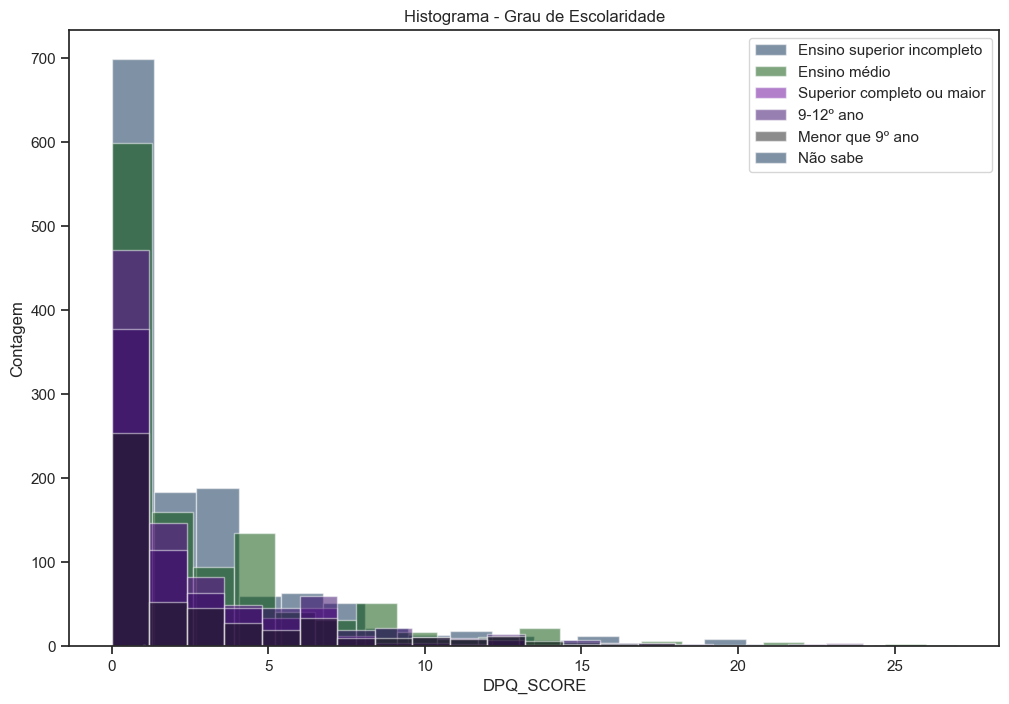

In [274]:
import matplotlib.pyplot as plt

# Histograma para cada grupo
plt.figure(figsize=(12, 8))
for group_name, group_data in [('Ensino superior incompleto', ensino_superior_incompleto),
                               ('Ensino médio', ensino_medio),
                               ('Superior completo ou maior', superior_completo_ou_maior),
                               ('9-12º ano', nono_a_decimo_segundo),
                               ('Menor que 9º ano', menor_nono),
                               ('Não sabe', nao_sabe)]:
    plt.hist(group_data, bins=20, alpha=0.5, label=group_name)

plt.title('Histograma - Grau de Escolaridade')
plt.xlabel('DPQ_SCORE')
plt.ylabel('Contagem')
plt.legend()
plt.show()

Os dados possuem uma assimetria positiva e está longe de ser considerado uma distribuição normal. Logo, será realizado um teste de hipótese mais robusto.

**Verificando a homogeneidade das variâcias:**

**Nível de Significância:** 0.05

**Hipótese Nula (H0):** (hipótese nula): As variâncias dos grupos são iguais.

**Hipótese Alternativa (Ha):** Pelo menos uma das variâncias dos grupos é significativamente diferente das outras.

In [275]:
# Teste de homogeneidade das variâncias
levene_statistic, levene_p_value = levene(ensino_superior_incompleto, ensino_medio, superior_completo_ou_maior, nono_a_decimo_segundo, menor_nono, nao_sabe)

print("Estatística de Levene:", levene_statistic)
print("Valor p:", levene_p_value)

Estatística de Levene: 10.87663250017324
Valor p: 2.0104049743459062e-10


Há evidências estatísticas para rejeitar a hipótese nula de homogeneidade das variâncias entre os grupos. Isso indica que pelo menos uma das variâncias dos grupos é significativamente diferente das outras. 

Dada a falta de homogeneidade das variâncias, é apropriado optar por um teste não paramétrico, como o teste de Kruskal-Wallis. Este teste é robusto a violações da homogeneidade das variâncias e à distribuição normal dos dados, sendo uma escolha adequada para análise quando essas suposições não são atendidas.

**Significância:** 0.05

**Hipótese Nula (H0):**
Não há diferença nas medianas dos escores de sintomas depressivos (DPQ_SCORE) entre os diferentes níveis de escolaridade.

**Hipótese Alternativa (H1):**
Há pelo menos uma diferença nas medianas dos escores de sintomas depressivos (DPQ_SCORE) entre os diferentes níveis de escolaridade.

In [276]:
# Realizando o teste de Kruskal-Wallis
h_statistic, p_value = kruskal(ensino_superior_incompleto, ensino_medio, superior_completo_ou_maior, nono_a_decimo_segundo, menor_nono, nao_sabe)

print("Estatística H de Kruskal-Wallis:", h_statistic)
print("Valor p:", p_value)

Estatística H de Kruskal-Wallis: 22.82395545626808
Valor p: 0.0003647515237024858


Como o valor p é menor que o nível de significância de 0.05, podemos rejeitar a hipótese nula de que não há diferença nas medianas dos escores de sintomas depressivos entre os diferentes níveis de escolaridade. Portanto, podemos concluir que há evidências estatisticamente significativas para sugerir que pelo menos um dos grupos tem uma mediana diferente dos outros em relação ao DPQ_SCORE.

Será realizad o teste de Conover pois, o teste de Conover, não têm pressupostos tão rigorosos quanto os testes paramétricos, como o teste de Tukey. Eles são mais robustos em relação à distribuição dos dados e não requerem homogeneidade de variâncias.

In [277]:
# Realizando o teste de Conover-Iman para comparações múltiplas
posthoc_results = sp.posthoc_conover([ensino_superior_incompleto, ensino_medio, superior_completo_ou_maior, nono_a_decimo_segundo, menor_nono, nao_sabe], p_adjust='holm')

# Exibindo os resultados do teste de comparações múltiplas
print("Teste de comparações múltiplas (Conover-Iman):")
print(posthoc_results)

Teste de comparações múltiplas (Conover-Iman):
          1         2         3         4         5    6
1  1.000000  1.000000  0.092909  0.198574  1.000000  1.0
2  1.000000  1.000000  0.010748  1.000000  1.000000  1.0
3  0.092909  0.010748  1.000000  0.000094  0.033157  1.0
4  0.198574  1.000000  0.000094  1.000000  1.000000  1.0
5  1.000000  1.000000  0.033157  1.000000  1.000000  1.0
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.0


Um valor de p menor que o nível de significância (0.05) indica que há uma diferença estatisticamente significativa entre os grupos comparados.

Valores de 1.0 indicam que não foram encontradas diferenças estatisticamente significativas entre os grupos comparados.


Os grupos "Superior completo ou maior" e "9-12º ano" têm um valor de p de 0.000094, indicando uma diferença significativa entre eles.

Os grupos "Superior completo ou maior" e "Menor que 9º ano" têm um valor de p de 0.033157, indicando uma diferença significativa entre eles.

Os grupos "Superior completo ou maior" e "ensino médio" têm um valor de p de 0.010748, indicando uma diferença significativa entre eles.

#### **Renda e DPQ_SCORE**

##### **4) A renda interfere no DPQ_SCORE?** 

In [278]:
salario_alto = df_unido['DPQ_SCORE'].loc[df_unido['INDFMINC'] == 'Alto']
salario_medio = df_unido['DPQ_SCORE'].loc[df_unido['INDFMINC'] == 'Médio']
salario_baixo = df_unido['DPQ_SCORE'].loc[df_unido['INDFMINC'] == 'Baixo']
salario_indefinido = df_unido['DPQ_SCORE'].loc[df_unido['INDFMINC'] == 'Indefinido']

Será realizado um teste para verificar se os dados seguem uma distribuição normal e se possuem homogeneidade entre as variâncias

**Significância:** 0.05

**H0:** Os dados seguem uma distribuição normal.

**Ha:** Os dados não seguem uma distribuição normal.

In [279]:
# Teste de normalidade (Shapiro-Wilk)
_, p_shapiro_alto = shapiro(salario_alto)
_, p_shapiro_medio = shapiro(salario_medio)
_, p_shapiro_baixo = shapiro(salario_baixo)
_, p_shapiro_indefinido = shapiro(salario_indefinido)

# Imprimir os resultados dos testes de normalidade
print("Teste de Normalidade (Shapiro-Wilk):")
print("Salário Alto - Valor p:", p_shapiro_alto)
print("Salário Médio - Valor p:", p_shapiro_medio)
print("Salário Baixo - Valor p:", p_shapiro_baixo)
print("Salário Indefinido - Valor p:", p_shapiro_indefinido)

Teste de Normalidade (Shapiro-Wilk):
Salário Alto - Valor p: 6.992486808510152e-44
Salário Médio - Valor p: 1.156819840448463e-44
Salário Baixo - Valor p: 3.630073996871301e-42
Salário Indefinido - Valor p: 4.884132189930249e-15


Como o p-valor é menor que a significância (0.05), rejeita-se a hipótese nula.

**Significância:** 0.05

**H0:** As variâncias dos grupos são iguais.

**Ha:** Pelo menos uma das variâncias dos grupos é diferente.

In [280]:
# Teste de homogeneidade de variâncias (Levene)
_, p_levene = levene(salario_alto, salario_medio, salario_baixo, salario_indefinido)

# Imprimir o resultado do teste de homogeneidade de variâncias
print("\nTeste de Homogeneidade de Variâncias (Levene):")
print("Valor p:", p_levene)


Teste de Homogeneidade de Variâncias (Levene):
Valor p: 6.842566036768786e-23


Pelo fato do p-valor ser menor que o nível de significância (0.05), rejeita-se a hipótese nula. 

Como não possui-se normalidade nem variâcias iguais (premissas necessárias para ANOVA) será realizado o teste Kruskal.

**Significância:** 0.05

**H0:** Não há diferença significativa entre as medianas.

**Ha:** Pelo menos um dos grupos possui mediana diferente.

In [281]:
# Realizando o teste de Kruskal-Wallis
h_statistic, p_value = kruskal(salario_alto, salario_medio, salario_baixo, salario_indefinido)

print("Estatística H de Kruskal-Wallis:", h_statistic)
print("Valor p:", p_value)

Estatística H de Kruskal-Wallis: 77.12372136485
Valor p: 1.270153591681773e-16


Por conta do p-valor ser menor que a significância, rejeita-se a hipótese nula de que as medianas dos grupos são iguais.

In [282]:
# Realizando o teste de Conover-Iman para comparações múltiplas
posthoc_results = sp.posthoc_conover([salario_alto, salario_medio, salario_baixo, salario_indefinido],p_adjust='holm')

# Exibindo os resultados do teste de comparações múltiplas
print("Teste de comparações múltiplas (Conover-Iman):")
print(posthoc_results)

Teste de comparações múltiplas (Conover-Iman):
              1             2             3         4
1  1.000000e+00  2.508700e-01  5.331230e-16  0.235413
2  2.508700e-01  1.000000e+00  1.861087e-10  0.250870
3  5.331230e-16  1.861087e-10  1.000000e+00  0.250870
4  2.354134e-01  2.508700e-01  2.508700e-01  1.000000


Há uma diferença significativa entre os grupos de salário alto e baixo, pois o valor-p é menor que 0.05 (5.331230e-16).

Há diferença significativa entre os grupos de salario baixo e salario médio, pois o valor-p é menor que 0.05 (1.861087e-10).

#### **Idade e DPQ_SCORE**

##### **5) Existe correlação entre idade e DPQ_SCORE?**

**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação entre a idade e o DPQ_SCORE (correlação igual a zero na população).

**Hipótese alternativa (Ha):** Existe uma correlação entre a idade e o DPQ_SCORE (a correlação não é zero na população).

In [283]:
_, p_valor = pearsonr(df_unido['RIDAGEYR'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação monotônica entre a idade e o DPQ_SCORE na população.

**Hipótese alternativa (Ha):** Existe uma correlação monotônica entre a idade e o DPQ_SCORE na população.

In [284]:
_, p_valor = spearmanr(df_unido['RIDAGEYR'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


Rejeita-se a hipótese nula de que não há correlação entre a idade e o DPQ_SCORE.

#### **Atividade Física E DPQ_SCORE**

##### **6) Existe correlação entre atividade física e DPQ_SCORE?**

**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação entre a atividade física e o DPQ_SCORE (correlação igual a zero na população).

**Hipótese alternativa (Ha):** Existe uma correlação entre a atividade física e o DPQ_SCORE (a correlação não é zero na população).

In [285]:
_, p_valor = pearsonr(df_unido['PAG_MINW'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação monotônica entre a atividade física e o DPQ_SCORE na população.

**Hipótese alternativa (Ha):** Existe uma correlação monotônica entre a atividade física e o DPQ_SCORE na população.

In [286]:
_, p_valor = spearmanr(df_unido['PAG_MINW'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


Como o p-valor é menor que o nível de significância, rejeita-se a hipótese nula de que não há correlação entre atividade física e DPQ_SCORE.

#### **Score nutricional e DPQ_SCORE**

##### **7) Existe correlação entre score nutricional e DPQ_SCORE?**

**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação entre o score nutricional e o DPQ_SCORE (correlação igual a zero na população).

**Hipótese alternativa (Ha):** Existe uma correlação entre o score nutricional e o DPQ_SCORE (a correlação não é zero na população).

In [287]:
_, p_valor = pearsonr(df_unido['HEI2015_TOTAL_SCORE'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


**Significância:** 0.05

**Hipótese nula (H0):** Não há correlação monotônica entre o score nutricional e o DPQ_SCORE na população.

**Hipótese alternativa (Ha):** Existe uma correlação monotônica entre o score nutricional e o DPQ_SCORE na população.

In [288]:
_, p_valor = spearmanr(df_unido['HEI2015_TOTAL_SCORE'], df_unido['DPQ_SCORE'])

if p_valor < 0.05:
    print('Rejeita-se a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita-se a hipótese nula.


Rejeita-se a hipótese nula de que não há correlação entre o score nutricional e o DPQ_SCORE, pois p-valor está abaixo de 0.05 (nível de significância).

### **Conclusão:**


##### **1) Perfil de Indivíduos com Sintomas Depressivos nos EUA (2005-2006):**
* **Gênero e Depressão:** Ao observar os resultados, percebemos que as médias do DPQ_SCORE, que indicam sintomas depressivos, variam significativamente entre homens e mulheres. Isso sugere que a depressão pode se manifestar de maneira diferente conforme o gênero. As mulheres tendem a ter um valor maior nos sintomas depressivos.

* **Etnia e Depressão:** Não há evidências conclusivas de diferenças significativas nos níveis de sintomas depressivos entre diferentes grupos étnicos, com base nos dados analisados.
* **Grau de Escolaridade e Depressão:** Os resultados apontam que os níveis de escolaridade têm impacto nos sintomas depressivos. Ou seja, pessoas com diferentes níveis de educação podem apresentar sintomas depressivos em intensidades diversas.
* **Renda e Depressão:** A análise sugere que a renda está associada aos sintomas depressivos. Os dados indicam que os níveis de renda podem influenciar a manifestação da depressão.
* **Idade e Depressão:** Existe uma correlação entre idade e sintomas depressivos, indicando que a idade pode ser um fator relevante na experiência da depressão.
##### **2) Associação entre Hábitos Saudáveis e Depressão nesta População**
* **Atividade Física e Depressão:** Os dados sugerem que a prática de atividade física está relacionada a menores níveis de sintomas depressivos. 

* **Nutrição e Depressão:** Há indícios de que a qualidade da nutrição está associada aos sintomas depressivos. 

### **Recomendações para Pesquisas Futuras:**

- Implementar modelos de machine learning para prever o DPQ_SCORE com base nas outras variáveis, permitindo uma abordagem mais precisa e preditiva.

- Realizar uma análise multivariada para entender como diversas variáveis, como gênero e grau de escolaridade, impactam no DPQ_SCORE simultaneamente, possibilitando uma compreensão mais aprofundada das relações entre elas.

- Acrescentar mais variáveis sobre o indivíduo, como estado civil, histórico médico familiar, para enriquecer a análise e capturar uma gama mais ampla de influências potenciais nos sintomas depressivos.

Em síntese, este projeto oferece insights valiosos sobre a complexa interação entre diversos fatores socioeconômicos e comportamentais na manifestação da depressão. Esperamos contribuir para uma compreensão mais abrangente e holística da depressão. No entanto, reconhecemos a necessidade contínua de pesquisas interdisciplinares e abordagens inovadoras, como modelos de machine learning, para aprimorar nossa capacidade de prever, diagnosticar e tratar eficazmente essa condição debilitante que afeta milhões de pessoas em todo o mundo.